In [1]:
## Import the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
patients_df = pd.read_csv("indian_liver_patient.csv")
patients_df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


#### **``Data Shape``**

In [3]:
patients_df.shape

(583, 11)

#### **``Variables Datatypes``**

In [4]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#### **``Check for Null/NaN or Missing values``**

In [5]:
label_font_dict = {'family':'calibri','size':18,'color':'coral','style':'italic'}
title_font_dict = {'family':'calibri','size':20,'color':'Blue','style':'italic'}

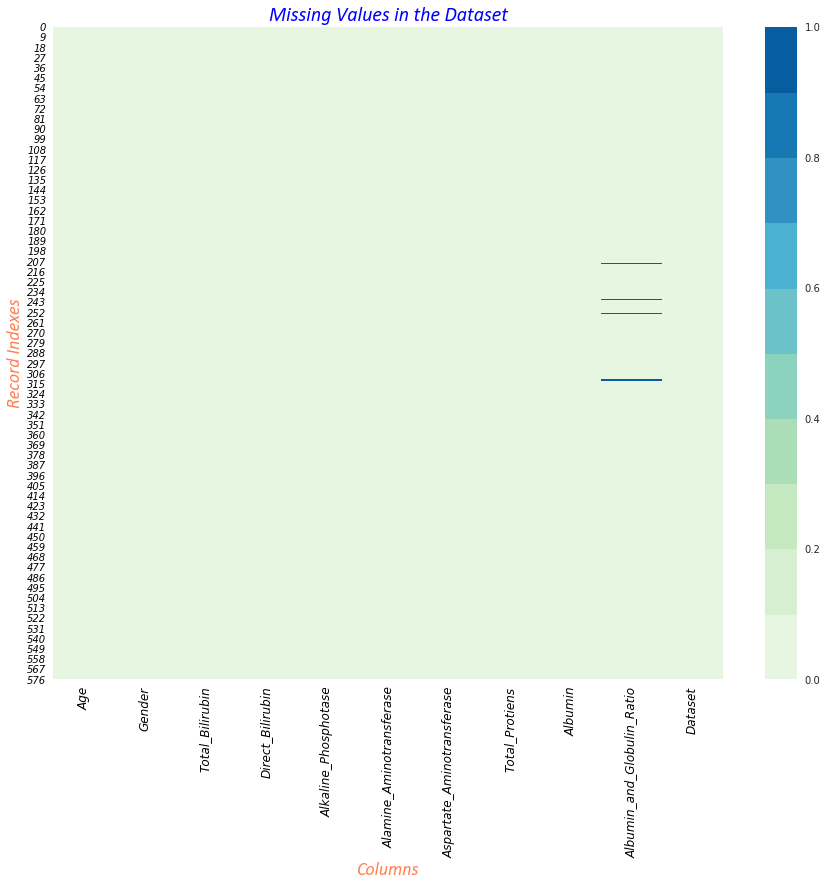

In [6]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,12))
    sns.heatmap(data=pd.DataFrame(patients_df.isnull()),cmap=ListedColormap(sns.color_palette('GnBu',10)))
    plt.xlabel('Columns',fontdict=label_font_dict)
    plt.ylabel('Record Indexes',fontdict=label_font_dict)
    plt.title('Missing Values in the Dataset',fontdict=title_font_dict)
    plt.xticks(color='black',size=12,style='oblique')
    plt.yticks(color='black',size=10,style='oblique')
plt.show()

##### **This shows us that there are 4 missing records in the dataset in column "Albumin_and_Globulin_Ratio".**

#### **``PLOT - 1``**
##### **``"Age and Gender Wise Patients Count"``**

In [7]:
patients_as_per_age_gender = pd.DataFrame(patients_df.groupby(by=['Age','Gender']).count()['Total_Bilirubin']).reset_index()
patients_as_per_age_gender.columns = ['Age','Gender','Record_Count']
patients_as_per_age_gender.head()

,Age,Gender,Record_Count
0,4,Male,2
1,6,Male,1
2,7,Female,1
3,7,Male,1
4,8,Female,1


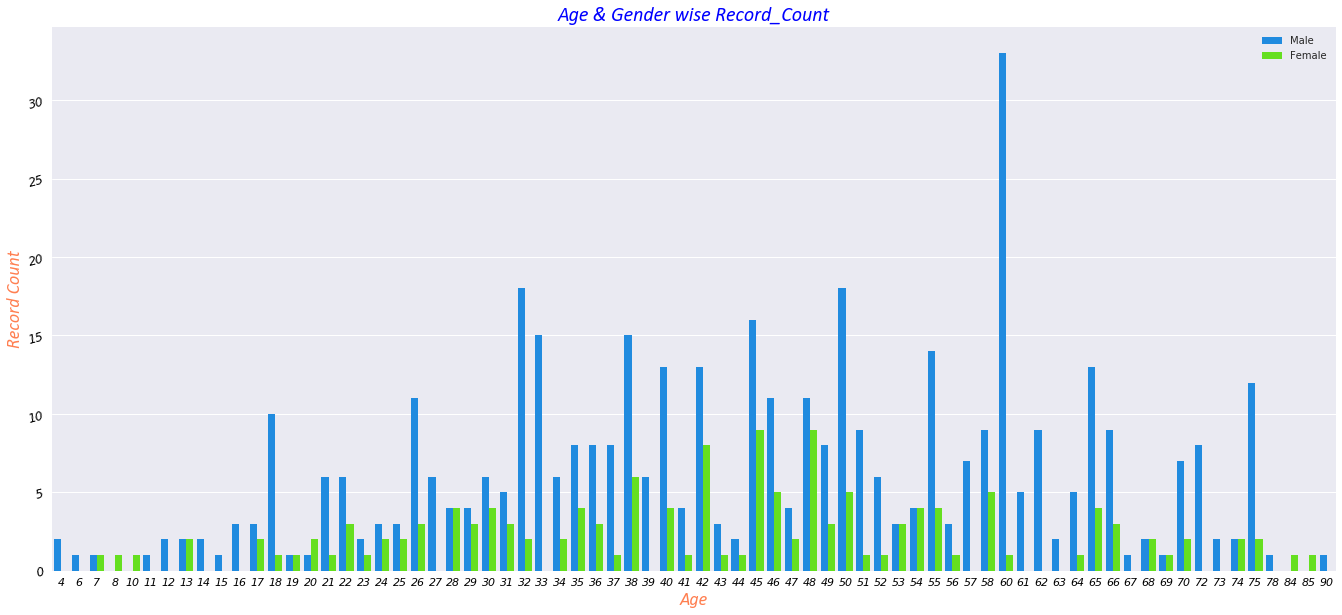

In [8]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(23,10))
    sns.barplot(x='Age',y='Record_Count',hue='Gender',data=patients_as_per_age_gender,palette=sns.color_palette('gist_rainbow_r',2))
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Record Count',fontdict=label_font_dict)
    plt.title('Age & Gender wise Record_Count',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=15,color='black',size=12,style='oblique')
    plt.legend(loc='upper right')

##### **This clearly shows us the difference in the number of female and male patients across Ages.**

#### **``PLOT - 2``**
##### **``"Positive and Negative Patients Count"``**

In [9]:
patients_df['Dataset'].unique()

array([1, 2], dtype=int64)

In [10]:
pos_neg_count = patients_df['Dataset'].value_counts().reset_index()
pos_neg_count.columns = ['Class','Patients_Count']
pos_neg_count

,Class,Patients_Count
0,1,416
1,2,167


In [11]:
patients_df['Label'] = patients_df['Dataset'].apply(lambda val: val if val == 1 else 0)
patients_df.drop(['Dataset'],axis=1,inplace=True)
pos_neg_count = patients_df['Label'].value_counts().reset_index()
pos_neg_count.columns = ['Class','Patients_Count']
pos_neg_count

,Class,Patients_Count
0,1,416
1,0,167


In [12]:
patients_df['Label'].unique()

array([1, 0], dtype=int64)

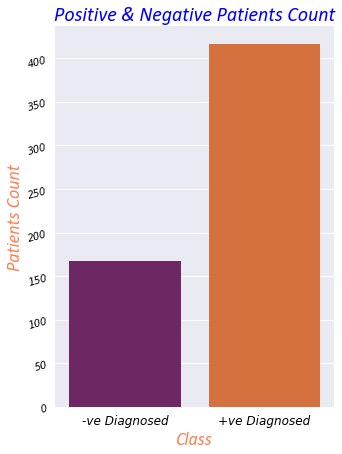

In [13]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(5,7))
    sns.barplot(x='Class',y='Patients_Count',data=pos_neg_count,palette='inferno')
    plt.xlabel('Class',fontdict=label_font_dict)
    plt.ylabel('Patients Count',fontdict=label_font_dict)
    plt.title('Positive & Negative Patients Count',fontdict=title_font_dict)
    plt.xticks(ticks=[0,1],labels=['-ve Diagnosed','+ve Diagnosed'],color='black',size=12,style='oblique')
    plt.yticks(rotation=15,color='black',size=10,style='oblique')
plt.show()

##### **This shows us that there is a class imbalance in this dataset. And, -ve patients are less than the 50% of the +ve ones.** 

#### **``PLOT - 3``**
##### **``"Positive and Negative Patients Count for both GENDER"``**

In [14]:
pos_neg_patients_as_per_gender = patients_df.groupby(['Gender','Label']).count()['Age'].reset_index()
pos_neg_patients_as_per_gender.columns = ['Gender','Label','Patients_Count']
pos_neg_patients_as_per_gender

,Gender,Label,Patients_Count
0,Female,0,50
1,Female,1,92
2,Male,0,117
3,Male,1,324


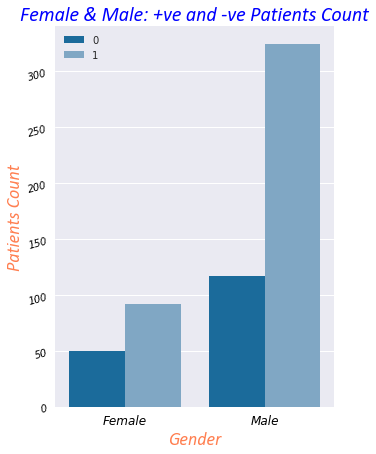

In [15]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(5,7))
    sns.barplot(x='Gender',y='Patients_Count',hue='Label',data=pos_neg_patients_as_per_gender,palette=sns.color_palette('PuBu_r',3))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Patients Count',fontdict=label_font_dict)
    plt.title('Female & Male: +ve and -ve Patients Count',fontdict=title_font_dict)
    plt.xticks(ticks=[0,1],labels=['Female','Male'],color='black',size=12,style='oblique')
    plt.yticks(rotation=15,color='black',size=10,style='oblique')
    plt.legend()
plt.show()

##### **This shows us that for Males there is a significant difference among +ve and -ve patients.**

#### **``PLOT - 4``**
##### **``"Positive and Negative Patients Count as per AGE and GENDER"``**

In [16]:
patients_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [17]:
pos_neg_patients_as_per_age_gender = patients_df.groupby(['Age','Gender','Label']).count()['Total_Bilirubin'].reset_index()
pos_neg_patients_as_per_age_gender.columns = ['Age','Gender','Label','Patients_Count']
pos_neg_patients_as_per_age_gender.head()

,Age,Gender,Label,Patients_Count
0,4,Male,0,2
1,6,Male,0,1
2,7,Female,1,1
3,7,Male,0,1
4,8,Female,1,1


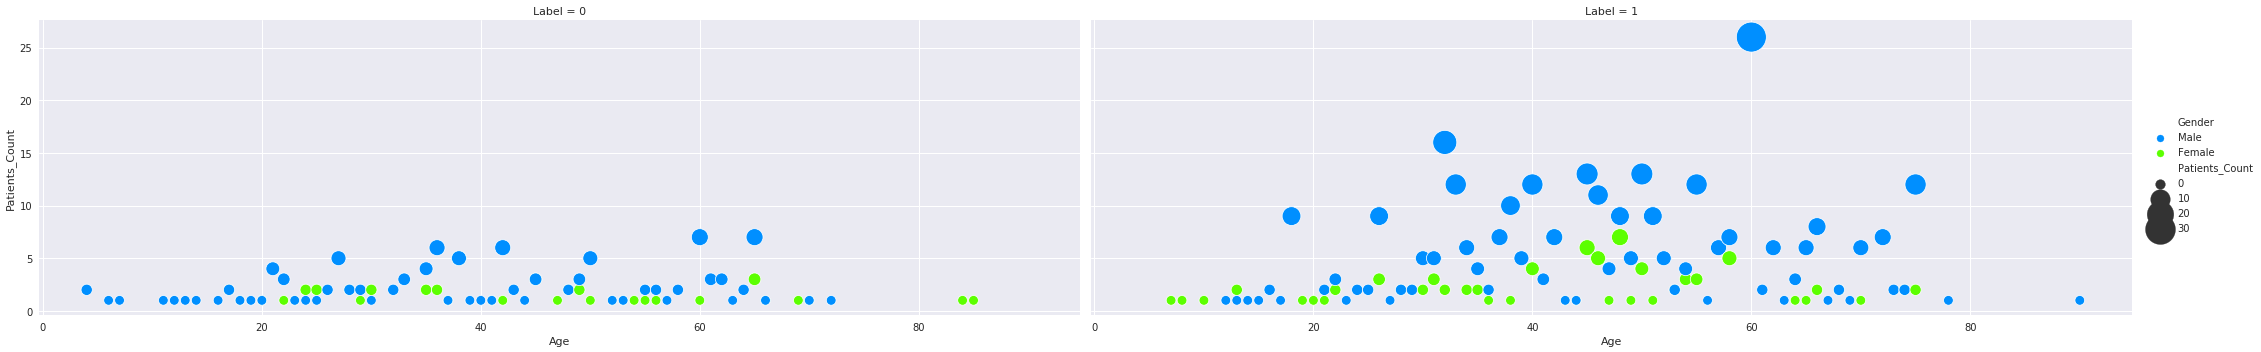

In [18]:
with plt.style.context('seaborn'):
    sns.relplot(x='Age',y='Patients_Count',hue='Gender',col='Label',data=pos_neg_patients_as_per_age_gender,size='Patients_Count',sizes=(95,900),
                palette=sns.color_palette('gist_rainbow_r',2),height=5,aspect=3)
plt.show()

##### **This shows the bifurcation of +ve and -ve patients across Age for both the Genders.**
##### **Few points to joot down here:**
- ###### **Among females the major spikes are only present in the age group of 40-50 years**
- ###### **One question that this dataset loudly raise, is that, does liver disease is not prevalent among Indian females?**
    - ###### **To gain understanding around that we really need to study the alcohol/smoking habits of females or their lifestyle in rural/urban/sub urban regions of India.**
    - ###### **Below are some links that can be checked out:**

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3025160/

https://www.thenewsminute.com/article/andhra-pradesh-tops-smoking-and-alcohol-consumption-kerala-comes-second-44996

https://www.shethepeople.tv/news/indian-women-drinking-more/#:~:text=Key%20Points%3A-,Alcohol%20consumption%20in%20India%20increased%20by%2038%20percent%20between%202010,report%20by%20AIIMS%20as%20saying.

#### **``PLOT - 5``**
##### **``"Does higher value of Total Bilirubin leads to Liver Disease?"``**

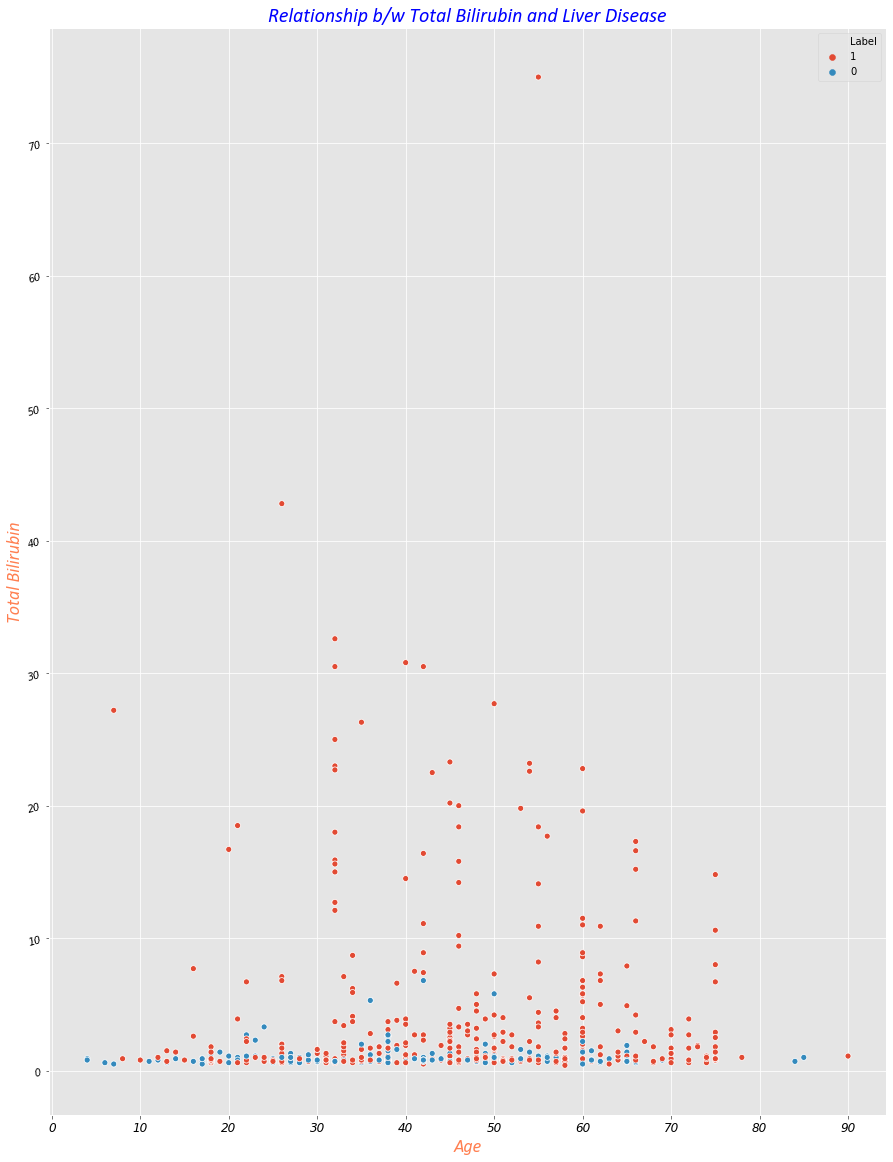

In [19]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(15,20))
    sns.scatterplot(x='Age',y='Total_Bilirubin',hue='Label',data=patients_df,hue_order=[1,0])
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Total Bilirubin',fontdict=label_font_dict)
    plt.title('Relationship b/w Total Bilirubin and Liver Disease',fontdict=title_font_dict)
    plt.xticks(ticks=[0,10,20,30,40,50,60,70,80,90],color='black',size=12,style='oblique')
    plt.yticks(rotation=15,color='black',size=10,style='oblique')
plt.show()

##### **This is clearly evident that higher value of Total Bilirubin does leads to Liver disease. However, there are positive cases at the lower value as well.** 
##### **Same is displayed in below chart ::**

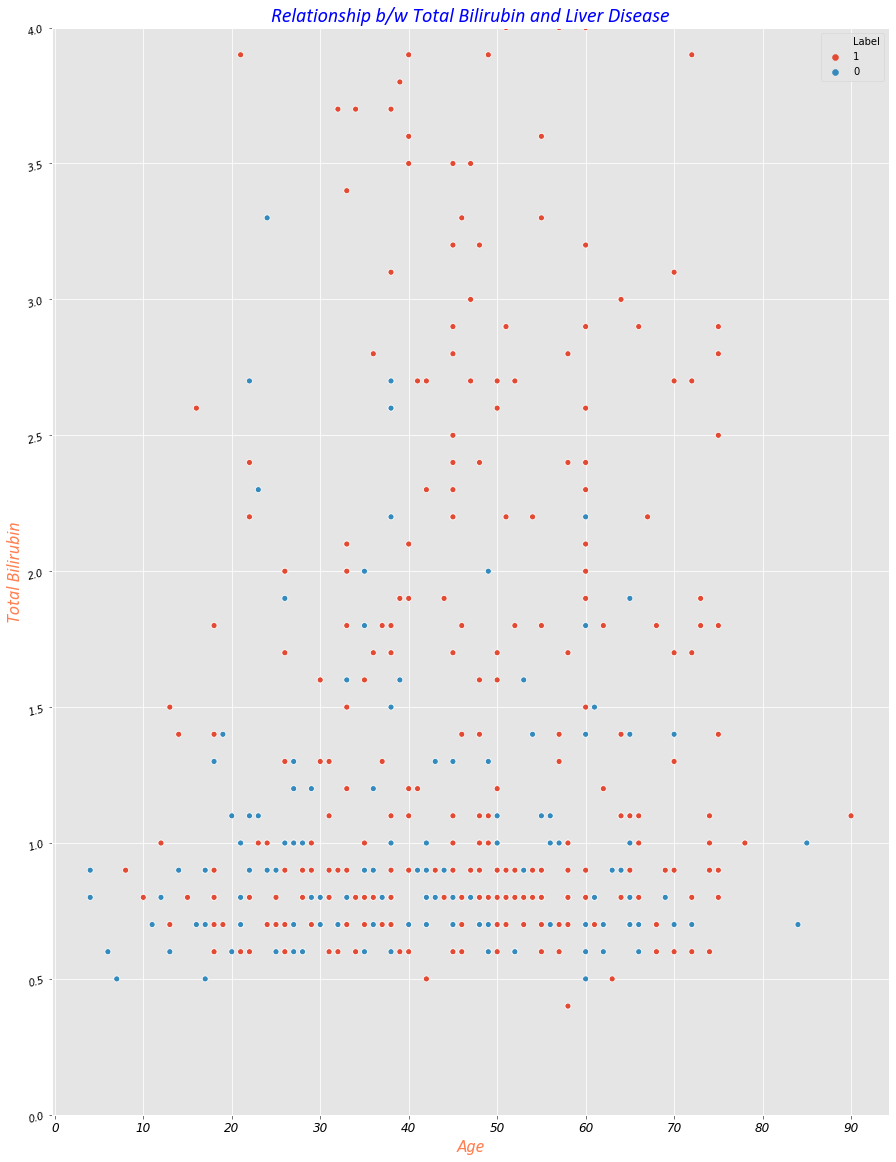

In [20]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(15,20))
    fig = sns.scatterplot(x='Age',y='Total_Bilirubin',hue='Label',data=patients_df,hue_order=[1,0])
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Total Bilirubin',fontdict=label_font_dict)
    plt.title('Relationship b/w Total Bilirubin and Liver Disease',fontdict=title_font_dict)
    plt.xticks(ticks=[0,10,20,30,40,50,60,70,80,90],color='black',size=12,style='oblique')
    plt.yticks(rotation=15,color='black',size=10,style='oblique')
    plt.ylim(bottom=0,top=4)
plt.show()

#### **``PLOT - 6``**
##### **``"Above plot raises a question : Does liver problems are more prominent at a higher age?"``**
###### **From first look of above Scatter Plot it doesn't seems like that. Still, let's plot a line graph..**

In [21]:
pos_neg_patients_as_per_age = patients_df.groupby(['Age','Label']).count()['Gender'].reset_index()
pos_neg_patients_as_per_age.columns = ['Age','Label','Patients_Count']
pos_neg_patients_as_per_age.head()

,Age,Label,Patients_Count
0,4,0,2
1,6,0,1
2,7,0,1
3,7,1,1
4,8,1,1


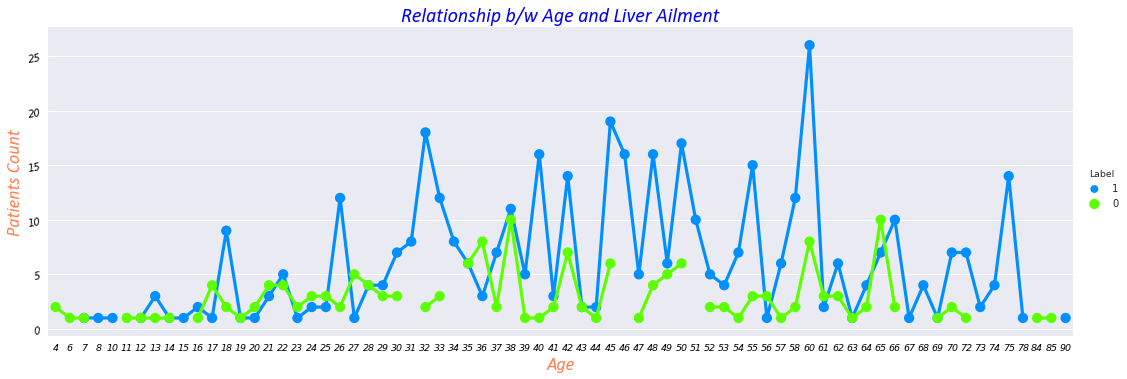

In [22]:
with plt.style.context('seaborn'):
    sns.catplot(x='Age',y='Patients_Count',hue='Label',data=pos_neg_patients_as_per_age,kind='point',
                height=5,aspect=3,hue_order=[1,0],palette=sns.color_palette('gist_rainbow_r',2))
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Patients Count',fontdict=label_font_dict)
    plt.title('Relationship b/w Age and Liver Ailment',fontdict=title_font_dict)
    plt.xticks(color='black',size=9.5,style='oblique')
    plt.yticks(rotation=10,color='black',size=10,style='oblique')
plt.show()

##### **So, the initial guess proves out to be correct as we can see the spikes across every age.** 
##### **However, there are few things which needs to be examined:**
- ###### **Some good number of patients below 35 years of age**
- ###### **Very less number of non-diseased people exist after 66 years of age**
    - ###### **And, we also witnessed a significant jump in the number of cases at 75 years of age**

#### **``PLOT - 7``**
##### **``"Does Total Bilirubin and Direct Bilirubin together leads to liver problems?"``**
###### **Going by the medical words this should be proved correct...**

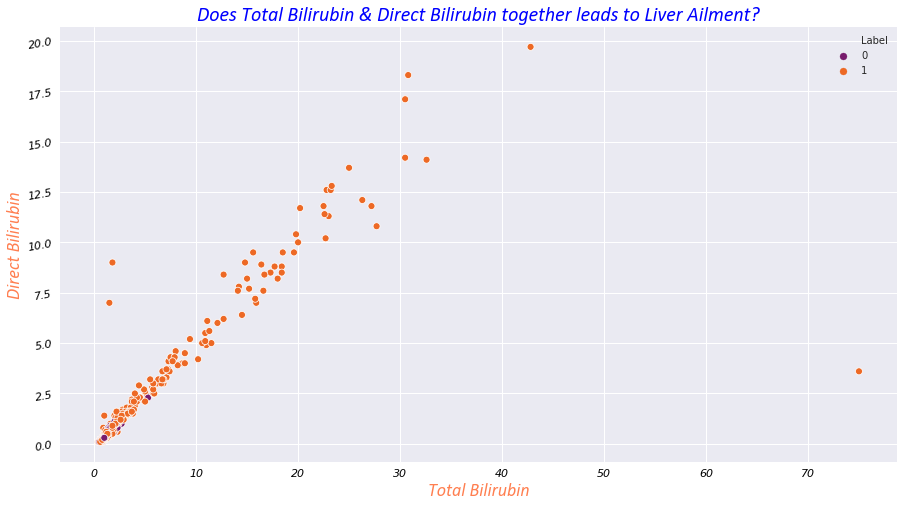

In [23]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,8))
    sns.scatterplot(x='Total_Bilirubin',y='Direct_Bilirubin',hue='Label',
                    hue_order=[0,1],data=patients_df,palette=sns.color_palette('inferno',2))
    plt.xlabel('Total Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Does Total Bilirubin & Direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

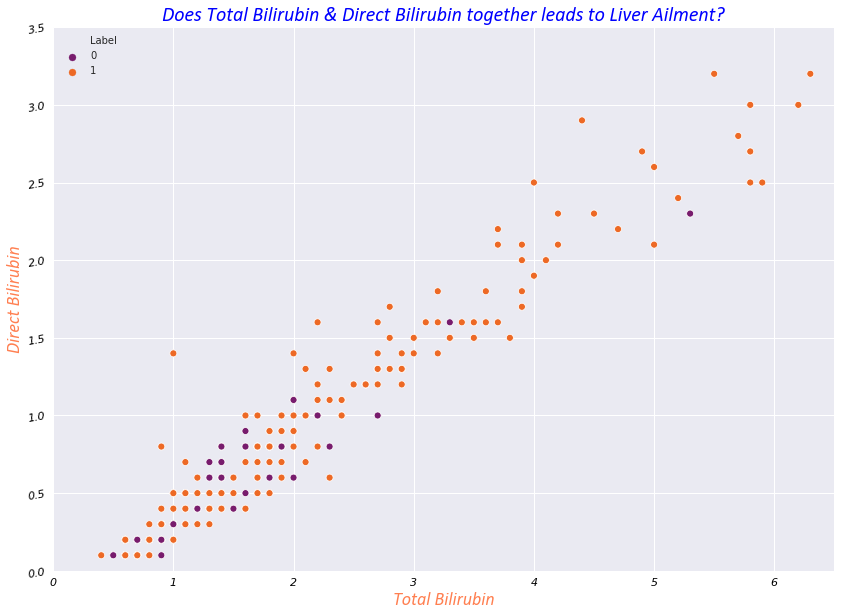

In [24]:
## Close-eye with shorter axes
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,10))
    sns.scatterplot(x='Total_Bilirubin',y='Direct_Bilirubin',hue='Label',
                    hue_order=[0,1],data=patients_df,palette=sns.color_palette('inferno',2))
    plt.ylim(0,3.5)
    plt.xlim(0,6.5)
    plt.xlabel('Total Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Does Total Bilirubin & Direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Here, we hit the bingo!! Statistically speaking it looks like Total Bilirubin & Direct Bilirubin both are correlated with each other and shows good sign of relationship.**

In [25]:
pearson_coeff_r = pd.DataFrame(np.corrcoef(patients_df['Total_Bilirubin'],patients_df['Direct_Bilirubin']))
pearson_coeff_r

,0,1
0,1.000000,0.874618
1,0.874618,1.000000


In [26]:
pearson_coeff_r_sqr = pearson_coeff_r.applymap(lambda val: np.square(val))
pearson_coeff_r_sqr

,0,1
0,1.000000,0.764957
1,0.764957,1.000000


##### **This mean approx 76% of the variations in these two variables are explainable because among them. And, they are positively correlated to each other.**

#### **``PLOT - 8``**
##### **``"Let's bring Unconjugated or Indirect Bilirubin in our dataset and examine its relationship with Total or Direct Bilirubin"``**
###### **Going by the medical words we would definitely find something good too here..**

In [27]:
patients_df['Unconjugated_bilirubin'] = patients_df['Total_Bilirubin'] - patients_df['Direct_Bilirubin']
patients_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label,Unconjugated_bilirubin
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0.6
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,5.4
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,3.2
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0.6
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1.9


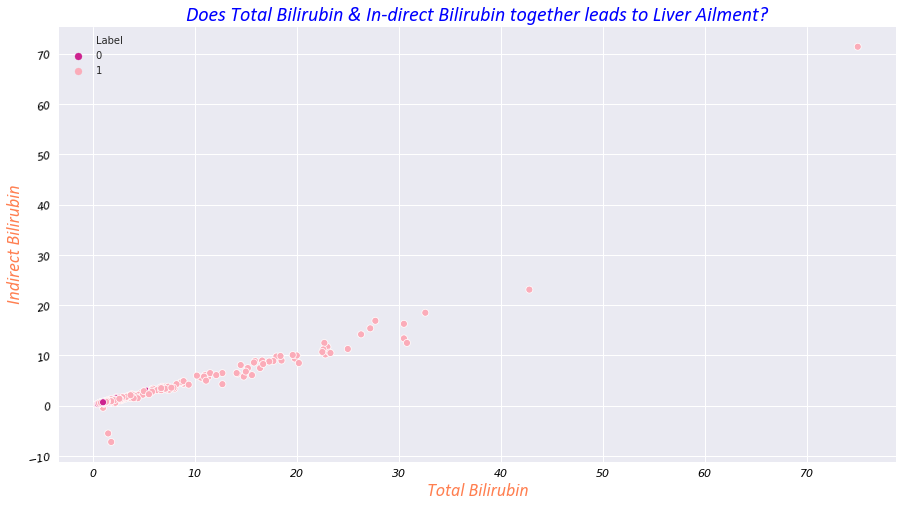

In [28]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,8))
    sns.scatterplot(x='Total_Bilirubin',y='Unconjugated_bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('RdPu_r',2))
    plt.xlabel('Total Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Indirect Bilirubin',fontdict=label_font_dict)
    plt.title('Does Total Bilirubin & In-direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **There is definitely a significant role of Total and Unconjugated Bilirubin towards Liver Disease.**
##### **Let's observe it closely:**

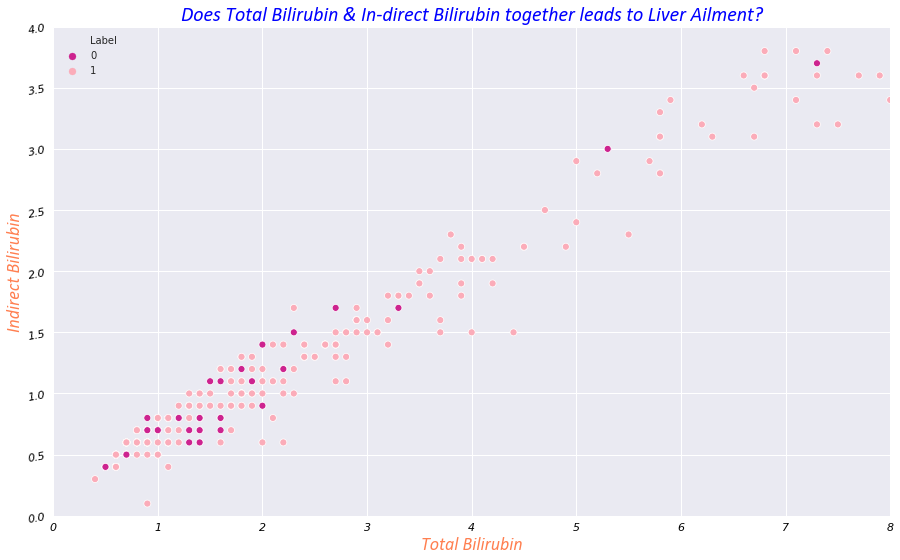

In [29]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,9))
    sns.scatterplot(x='Total_Bilirubin',y='Unconjugated_bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('RdPu_r',2))
    plt.xlim(0,8)
    plt.ylim(0,4)
    plt.xlabel('Total Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Indirect Bilirubin',fontdict=label_font_dict)
    plt.title('Does Total Bilirubin & In-direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **This definitely shows us that if someone has higher level of both Indirect and Total Bilirubin then there are severe chances of liver ailment.**
##### **Let's check their correlation value:**

In [30]:
np.corrcoef(patients_df['Total_Bilirubin'],patients_df['Unconjugated_bilirubin'])

array([[1.        , 0.94004973],
       [0.94004973, 1.        ]])

##### **As the scatter plot depicted both Total and Unconjugated Bilirubin are highly correlated with each other.**

In [31]:
pd.DataFrame(np.corrcoef(patients_df['Total_Bilirubin'],patients_df['Unconjugated_bilirubin'])).applymap(lambda val: np.square(val))

,0,1
0,1.000000,0.883694
1,0.883694,1.000000


##### **This mean approx 88% of the variations in these two variables are explainable among them. And, they are positively correlated to each other.**

#### **``PLOT - 9``**
##### **``"Let's visualize the distribution of Total, Direct and Indirect Bilirubin in males and females"``**

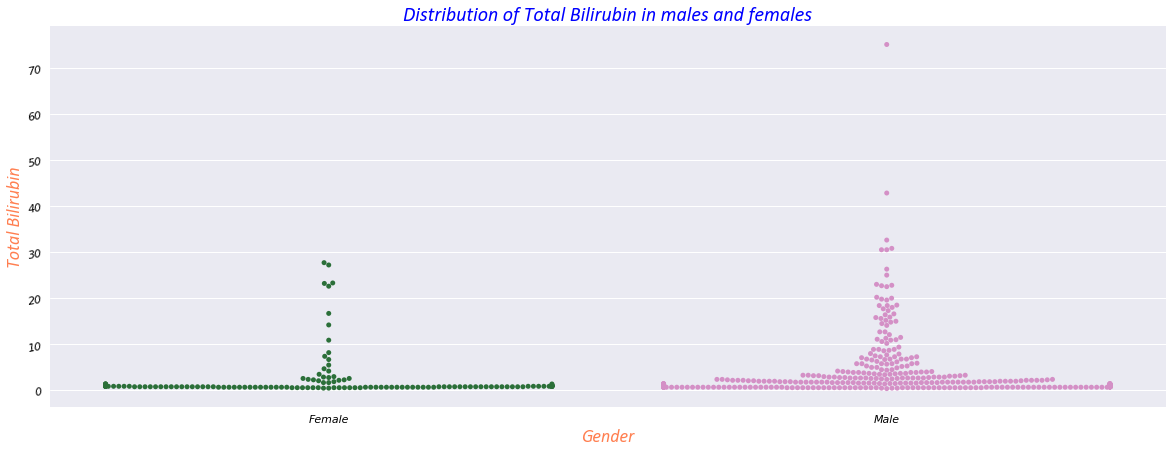

In [32]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Total_Bilirubin',data=patients_df,palette=sns.color_palette('cubehelix',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Total Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of Total Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Close-look**

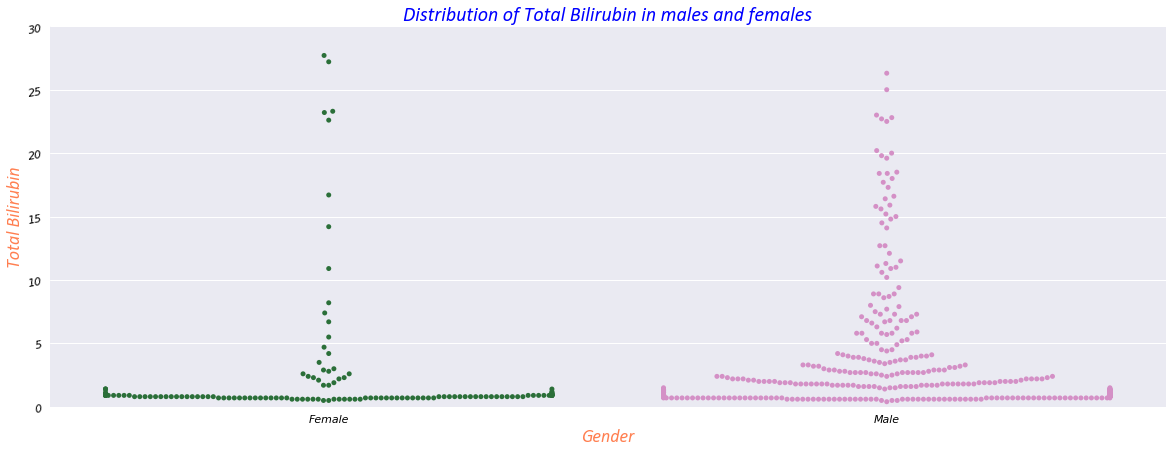

In [33]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Total_Bilirubin',data=patients_df,palette=sns.color_palette('cubehelix',2))
    plt.ylim(0,30)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Total Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of Total Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

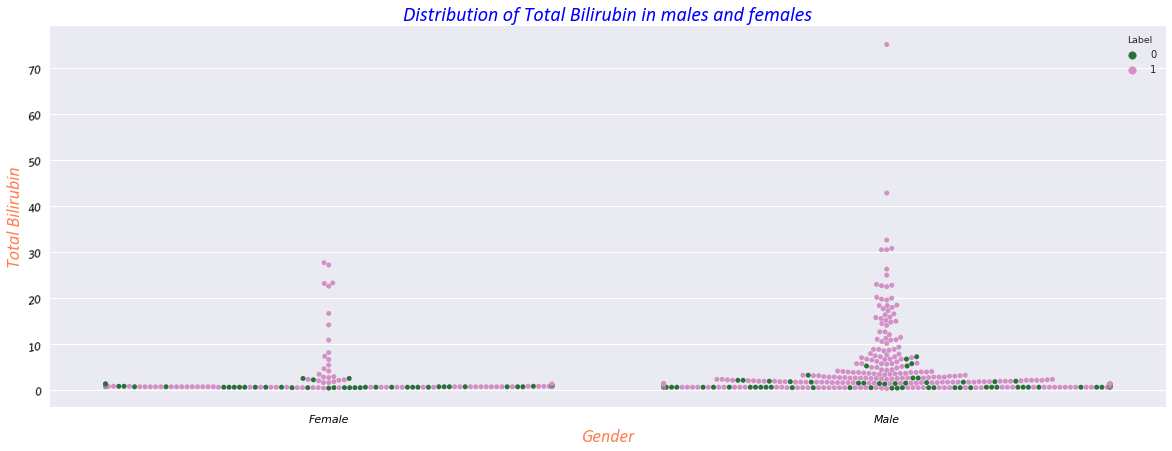

In [34]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Total_Bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('cubehelix',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Total Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of Total Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **``Direct Bilirubin``**

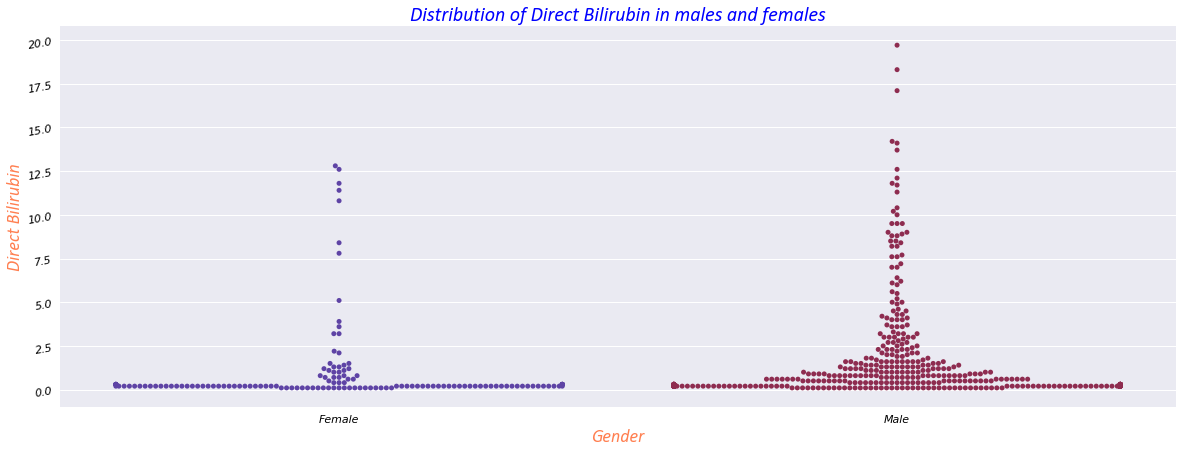

In [35]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Direct_Bilirubin',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of Direct Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

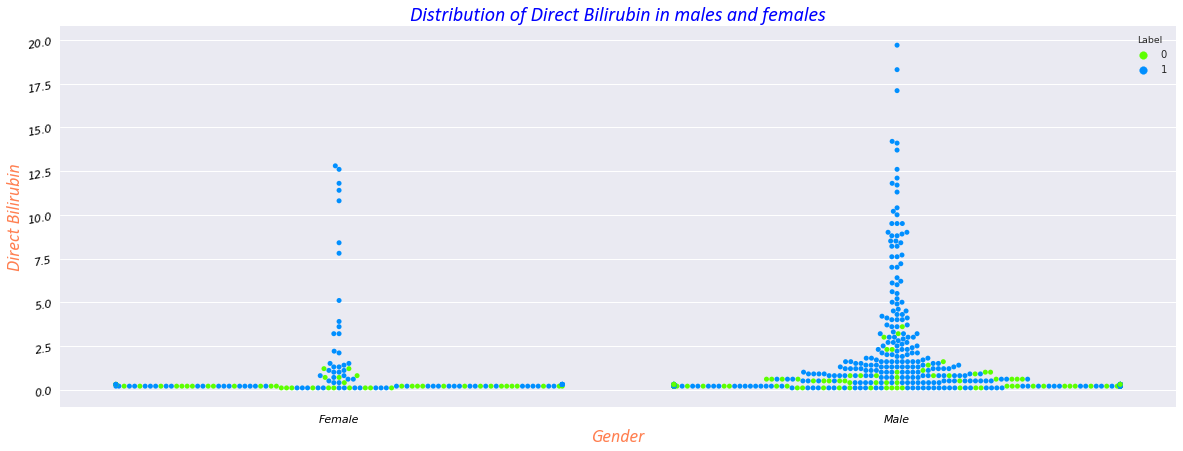

In [36]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Direct_Bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of Direct Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **``Unconjugated Bilirubin``**

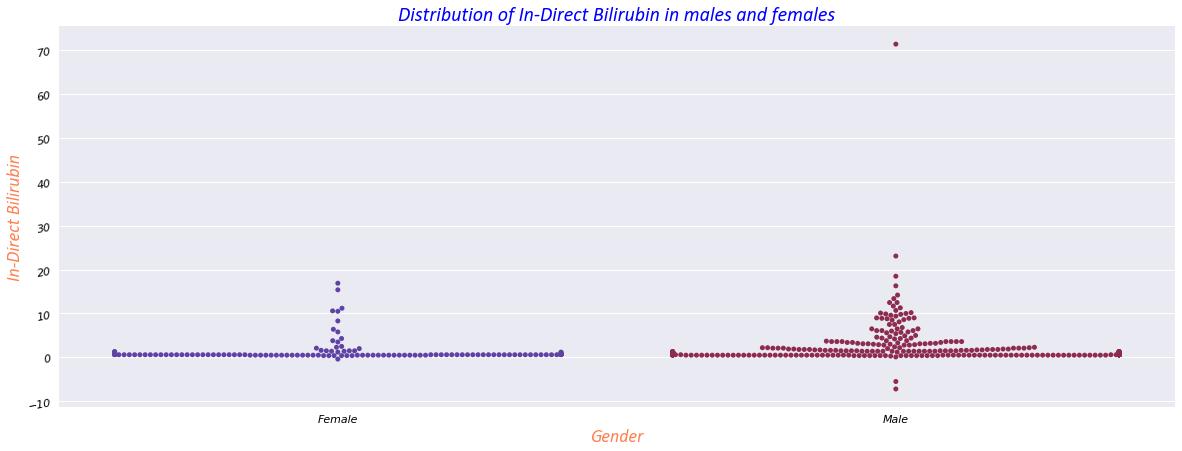

In [37]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Unconjugated_bilirubin',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('In-Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of In-Direct Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Close Look**

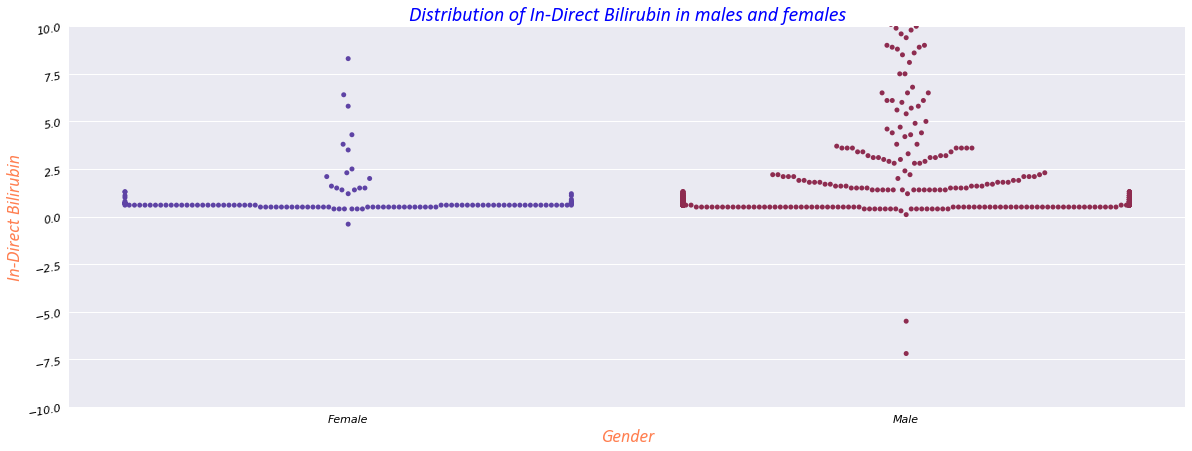

In [38]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Unconjugated_bilirubin',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.ylim(-10,10)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('In-Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of In-Direct Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

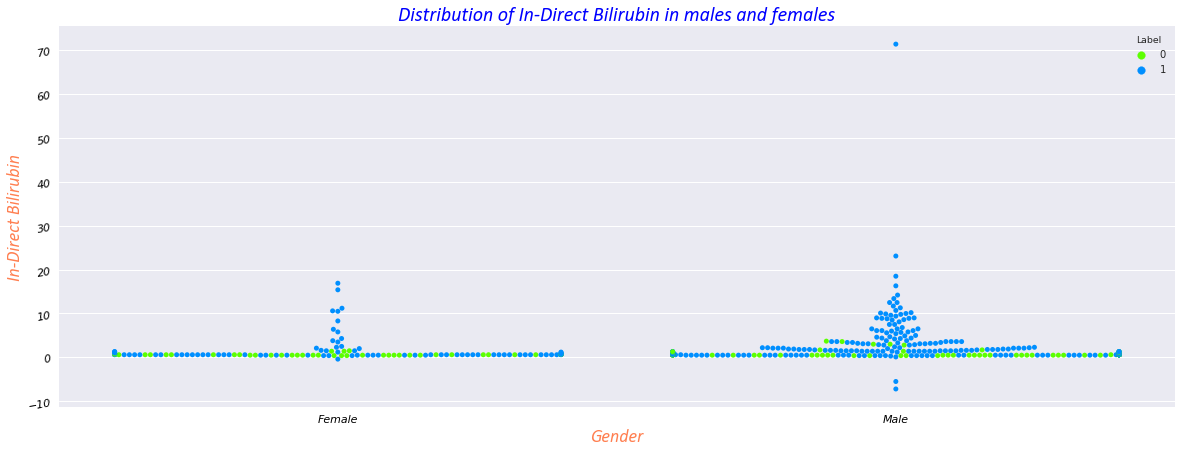

In [39]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Unconjugated_bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('In-Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of In-Direct Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

#### **``PLOT - 10``**
##### **``"Let's examine the relationship of Direct and In-direct Bilirubin"``**

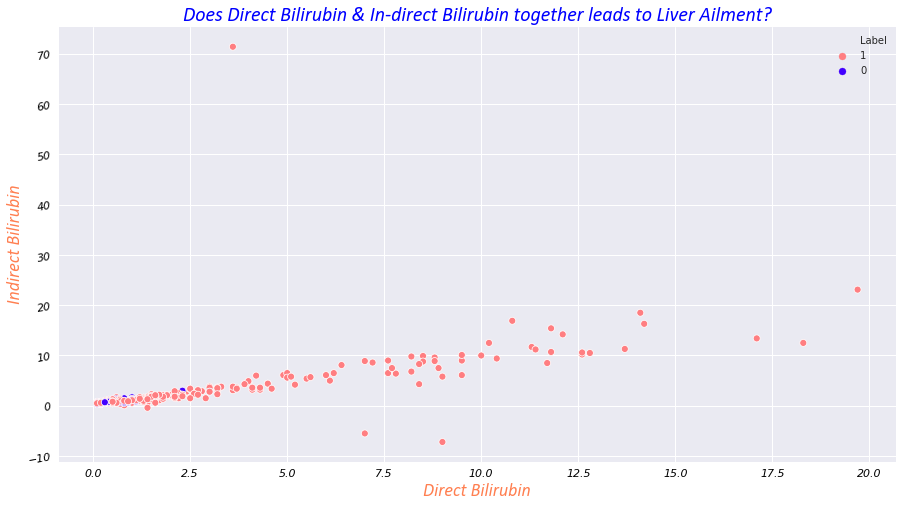

In [40]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,8))    
    sns.scatterplot(x='Direct_Bilirubin',y='Unconjugated_bilirubin',hue='Label',data=patients_df,
                    hue_order=[1,0],palette=sns.color_palette('gnuplot2_r',2))
    plt.xlabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Indirect Bilirubin',fontdict=label_font_dict)
    plt.title('Does Direct Bilirubin & In-direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **One point to note here is that data points are not tightly packed after a certian value of Direct Bilirubin which shows there might be a influence of other variable.**
##### **Let's observe it closely:**

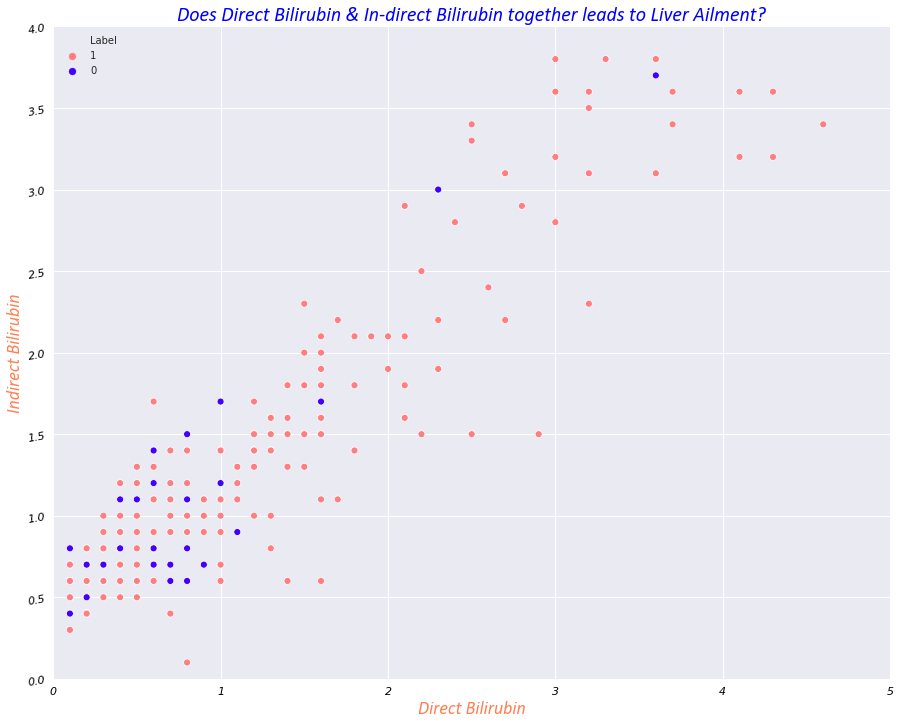

In [41]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,12))    
    sns.scatterplot(x='Direct_Bilirubin',y='Unconjugated_bilirubin',hue='Label',data=patients_df,
                    hue_order=[1,0],palette=sns.color_palette('gnuplot2_r',2))
    plt.xlim(0,5)
    plt.ylim(0,4)
    plt.xlabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Indirect Bilirubin',fontdict=label_font_dict)
    plt.title('Does Direct Bilirubin & In-direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
    plt.legend(loc='upper left')
plt.show()

##### **Let's check their correlation value:**

In [42]:
np.corrcoef(patients_df['Direct_Bilirubin'],patients_df['Unconjugated_bilirubin'])

array([[1.        , 0.65684506],
       [0.65684506, 1.        ]])

In [43]:
pd.DataFrame(np.corrcoef(patients_df['Direct_Bilirubin'],patients_df['Unconjugated_bilirubin'])).applymap(lambda val: np.square(val))

,0,1
0,1.000000,0.431445
1,0.431445,1.000000


##### **This mean approx 43% of the variations in these two variables are explainable among them. And, they are positively correlated to each other.**

#### **``PLOT - 11``**
##### **``"Let's see the trend In-direct Bilirubin across all ages"``**

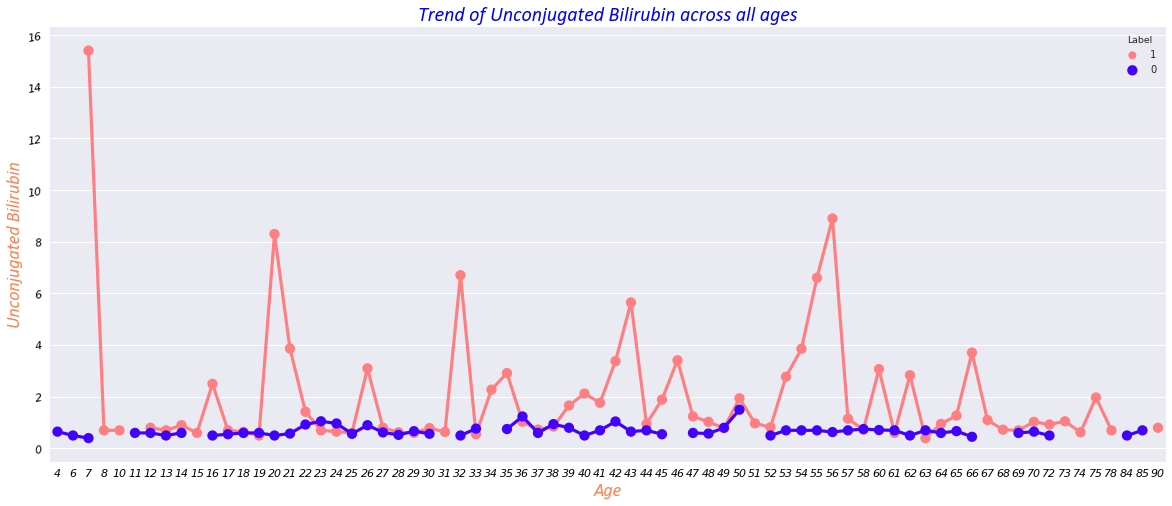

In [44]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,8))
    sns.pointplot(x='Age',y='Unconjugated_bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('gnuplot2_r',2),hue_order=[1,0],ci=False)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Unconjugated Bilirubin',fontdict=label_font_dict)
    plt.title('Trend of Unconjugated Bilirubin across all ages',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Well, the higher level of Unconjugated Bilirubin dictates the existence of Liver ailment. However, the lower level of it doesn't really rule out the possibility of disease.** 

#### **``PLOT - 12``**
##### **``"Above Point-plot gives rise to a question is that, does the level of In-direct Bilirubin varies significantly across gender?"``**

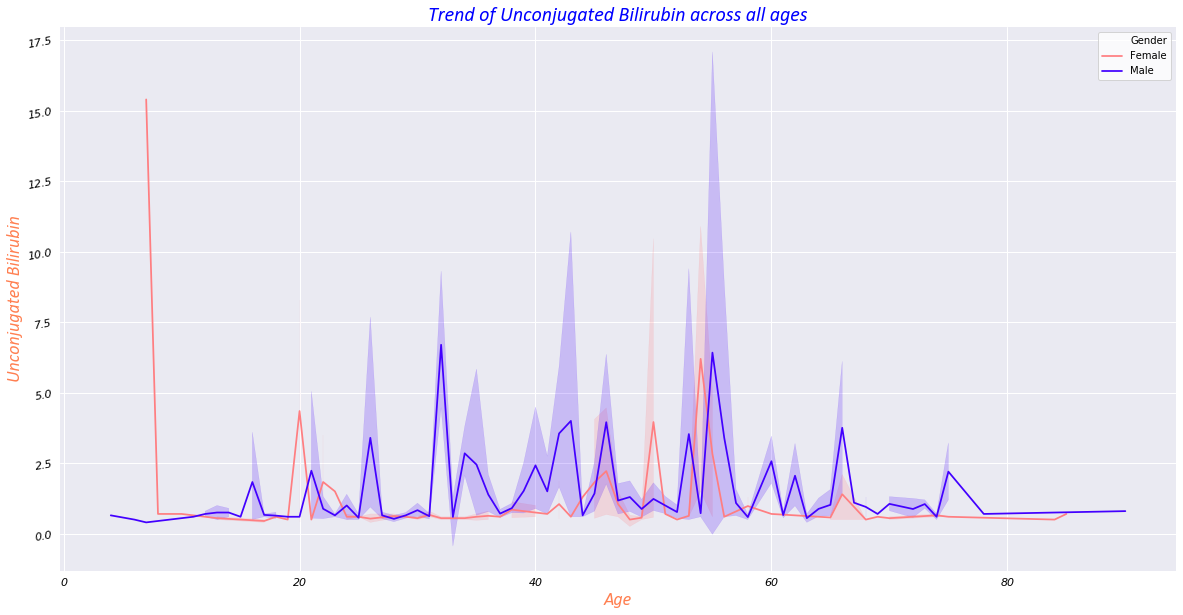

In [45]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,10))
    sns.lineplot(x='Age',y='Unconjugated_bilirubin',hue='Gender',data=patients_df,palette=sns.color_palette('gnuplot2_r',2),ci=95)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Unconjugated Bilirubin',fontdict=label_font_dict)
    plt.title('Trend of Unconjugated Bilirubin across all ages',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.legend(loc='upper right')
plt.show()

##### **This graph certainly caught my attention on below points:**
- ###### **The spike for females is higher than males at the age of 50 and both gender are at the same level of Unconjugated bilirubin at the age of 55** 
- ###### **The spike at the age of 20 in females is higher than males**
##### **``There can be multiple reasons for these spikes, So, before identifying their cause lets first check whether these spikes leads to liver disease.``** 

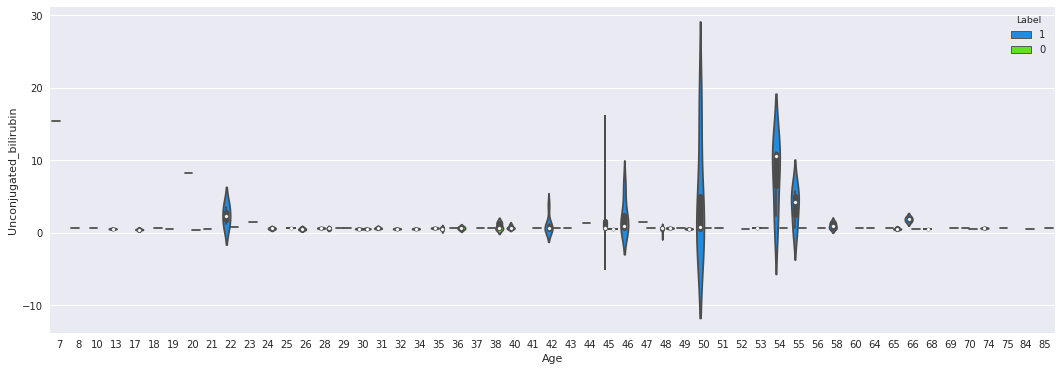

In [46]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,6))
    sns.violinplot(x='Age',y='Unconjugated_bilirubin',hue='Label',hue_order=[1,0],
                data=patients_df[patients_df['Gender'] == 'Female'],palette=sns.color_palette('gist_rainbow_r',2))
plt.show()

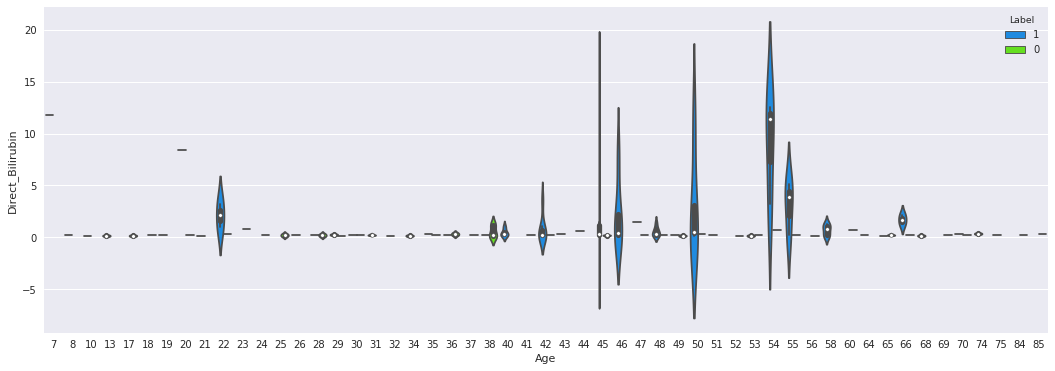

In [47]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,6))
    sns.violinplot(x='Age',y='Direct_Bilirubin',hue='Label',hue_order=[1,0],
                data=patients_df[patients_df['Gender'] == 'Female'],palette=sns.color_palette('gist_rainbow_r',2),ci=False)
plt.show()

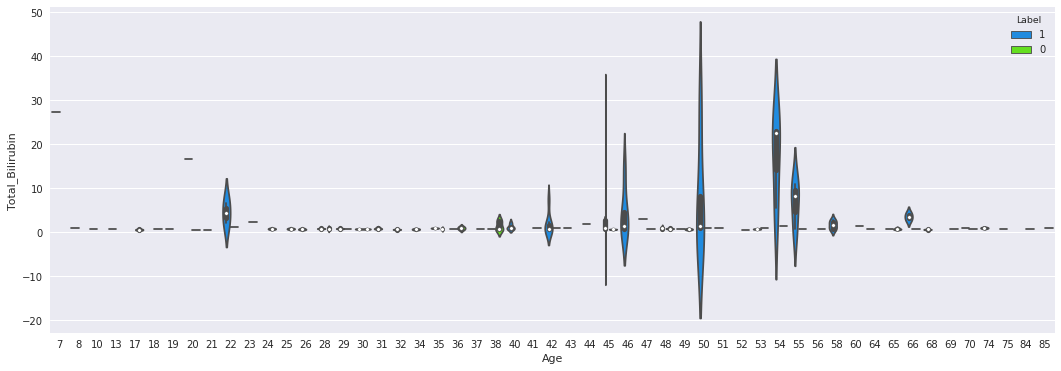

In [48]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,6))
    sns.violinplot(x='Age',y='Total_Bilirubin',hue='Label',hue_order=[1,0],
                data=patients_df[patients_df['Gender'] == 'Female'],palette=sns.color_palette('gist_rainbow_r',2),ci=False)
plt.show()

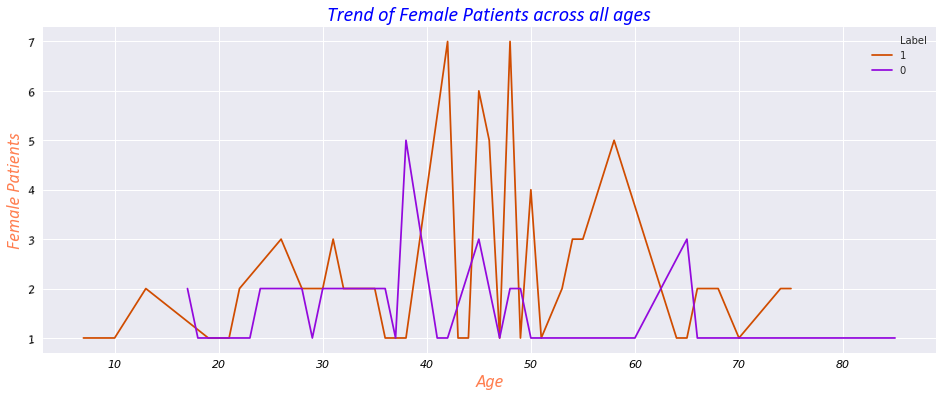

In [49]:
female_pos_neg = patients_df[patients_df['Gender'] == 'Female'].groupby(['Age','Label']).count()['Gender'].reset_index()
female_pos_neg.columns = ['Age','Label','Patients_Count']

with plt.style.context('seaborn'):
    plt.figure(figsize=(16,6))
    sns.lineplot(x='Age',y='Patients_Count',hue='Label',data=female_pos_neg,palette=sns.color_palette('gnuplot_r',2),hue_order=[1,0])
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Female Patients',fontdict=label_font_dict)
    plt.title('Trend of Female Patients across all ages',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Now, here the spikes which we discussed in previous plot showing the presence of multiple positively diagnosed cases. ``This definitely raises the eyebrow and can we say that postmenopausal(age >= 50) women are more prone to liver disease?``**
##### **``Check out below links and some papers do suggest that postmenopausal hormonal imbalance makes women vulnerable towards liver disease:``**

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4491951/

https://www.hindawi.com/journals/bmri/2015/131528/

https://www.rush.edu/health-wellness/discover-health/hormones-you-age#:~:text=For%20women%3A%20menopause,follicle%20stimulating%20hormone%20(FSH).

##### **``Check out below paper suggesting that postmenopausal the level of total and direct bilirubin increased significantly:``**
https://www.researchgate.net/publication/43084619_Altered_Liver_Function_and_the_Status_of_Calcium_in_Postmenopausal_Women_in_and_Around_Mangalore#:~:text=The%20level%20of%20total%20bilirubin,women's%20(p%3C0.0001).

##### **With respect to the spike at 20 years of age in females there can be multiple reasons for that, however, alcohol consumption and bad lifestyle can be the leading factors. Check out the below paper discussing the ``Problem alcohol drinking in rural women of Telangana region, Andhra Pradesh``.**
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3025160/

https://timesofindia.indiatimes.com/life-style/health-fitness/health-news/is-liver-disease-the-next-major-lifestyle-disease-of-india-after-diabetes-and-bp/articleshow/58122706.cms

https://thepapergown.zocdoc.com/why-are-more-young-women-getting-cirrhosis/#:~:text=For%20alcohol%2Drelated%20cirrhosis%20to,at%20the%20University%20of%20Michigan

#### **``PLOT - 13``**
##### **``"ALP trend in males and females across all ages"``**

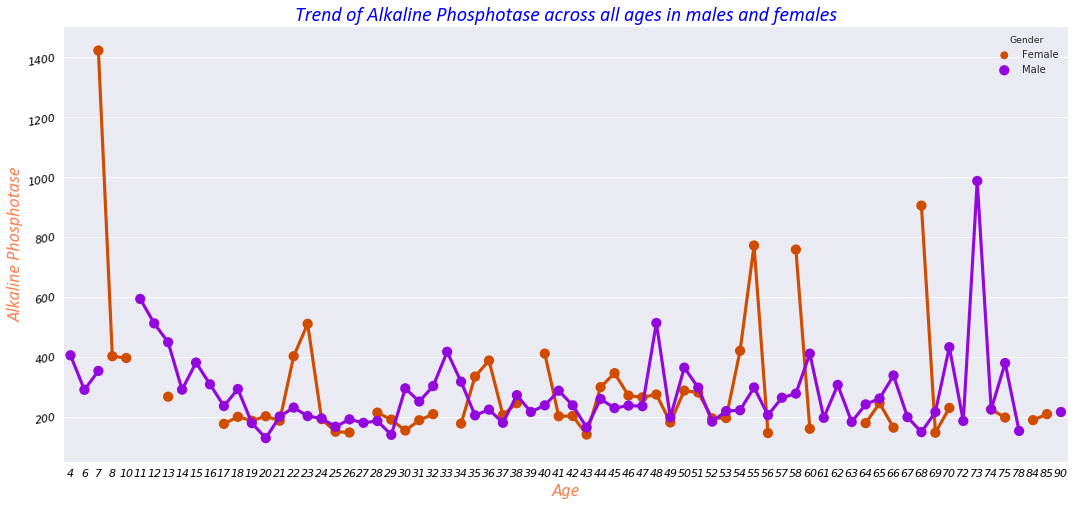

In [50]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,8))
    sns.pointplot(x='Age',y='Alkaline_Phosphotase',hue='Gender',data=patients_df,palette=sns.color_palette('gnuplot_r',2),ci=False)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Alkaline Phosphotase',fontdict=label_font_dict)
    plt.title('Trend of Alkaline Phosphotase across all ages in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **For females there is a moderate jump in the level of ASP after the age of 50. However, in males it tends to follow the consistent path with one paramount jump at the end.**

##### **Let's visualize the distirbution for +ve and -ve cases.**

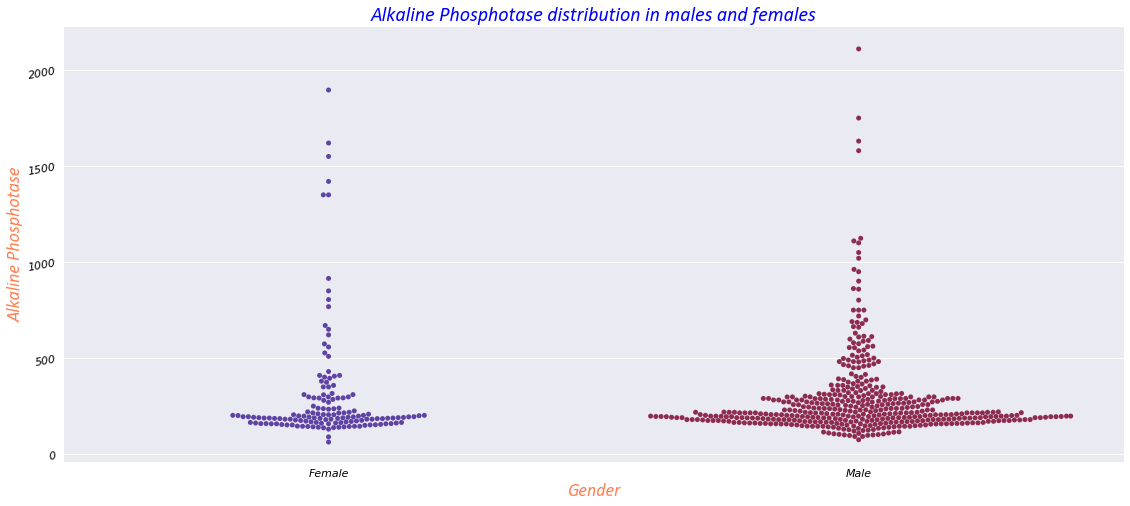

In [51]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Alkaline_Phosphotase',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alkaline Phosphotase',fontdict=label_font_dict)
    plt.title('Alkaline Phosphotase distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

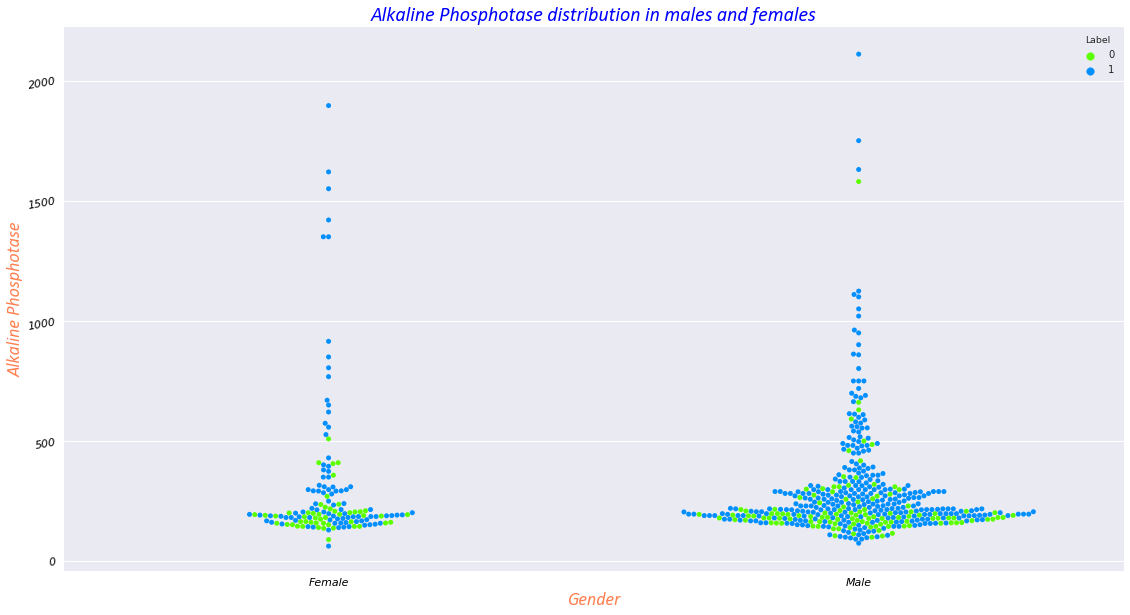

In [52]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,10))
    sns.swarmplot(x='Gender',y='Alkaline_Phosphotase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2),hue_order=[0,1])
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alkaline Phosphotase',fontdict=label_font_dict)
    plt.title('Alkaline Phosphotase distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Close Look**

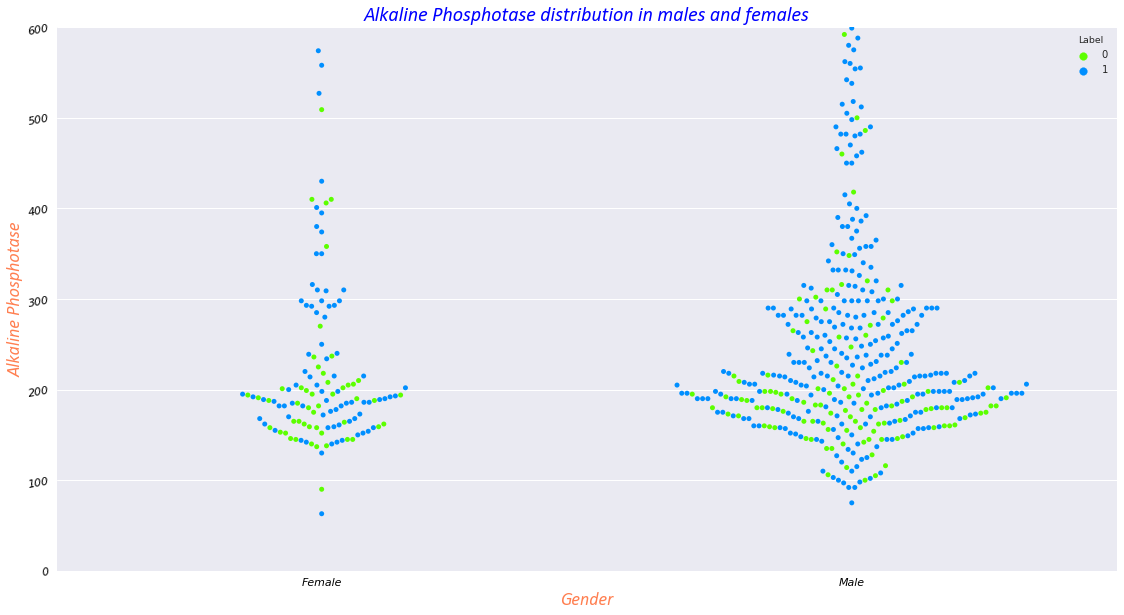

In [53]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,10))
    sns.swarmplot(x='Gender',y='Alkaline_Phosphotase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2),hue_order=[0,1])
    plt.ylim(0,600)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alkaline Phosphotase',fontdict=label_font_dict)
    plt.title('Alkaline Phosphotase distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

#### **``PLOT - 14``**
##### **``"ALT trend in males and females across all ages"``**

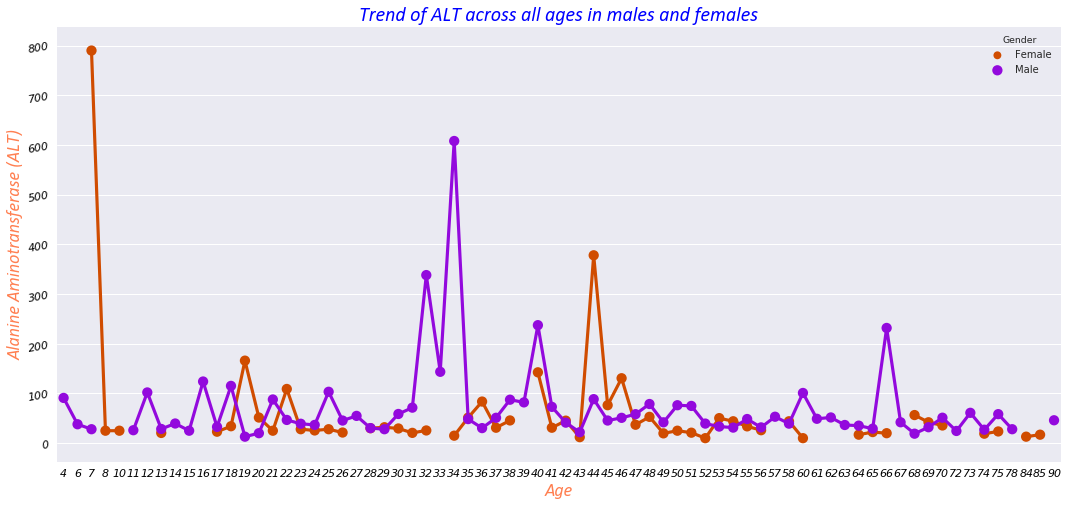

In [54]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,8))
    sns.pointplot(x='Age',y='Alamine_Aminotransferase',hue='Gender',data=patients_df,palette=sns.color_palette('gnuplot_r',2),ci=False)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Alanine Aminotransferase (ALT)',fontdict=label_font_dict)
    plt.title('Trend of ALT across all ages in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **For females the majority of the trend is flat with major spike at age of 44. Similar tend is visible in males with few peaks around the age of 35, 40 and 65.**

##### **Let's visualize the distirbution for +ve and -ve cases.**

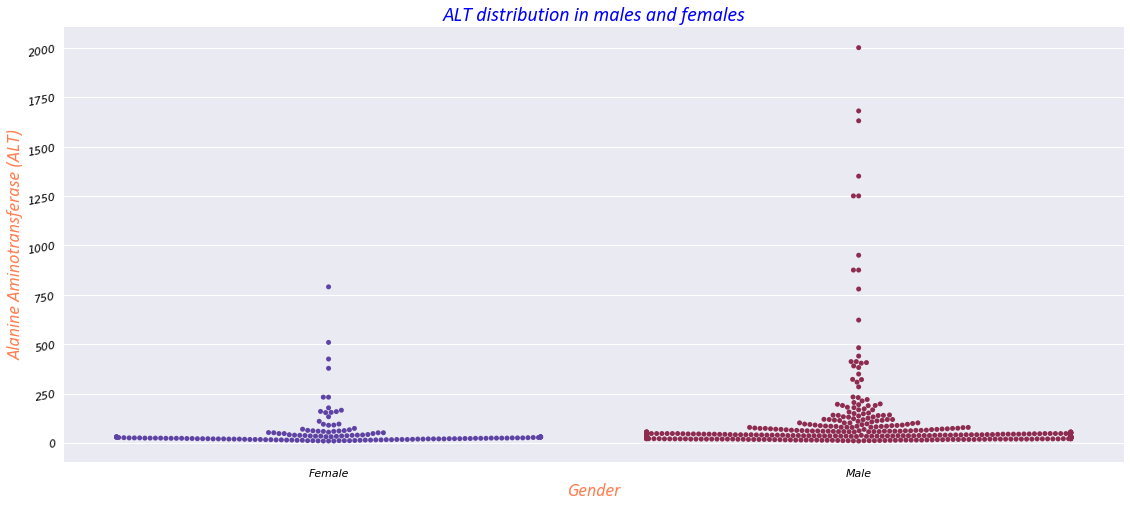

In [55]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Alamine_Aminotransferase',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alanine Aminotransferase (ALT)',fontdict=label_font_dict)
    plt.title('ALT distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

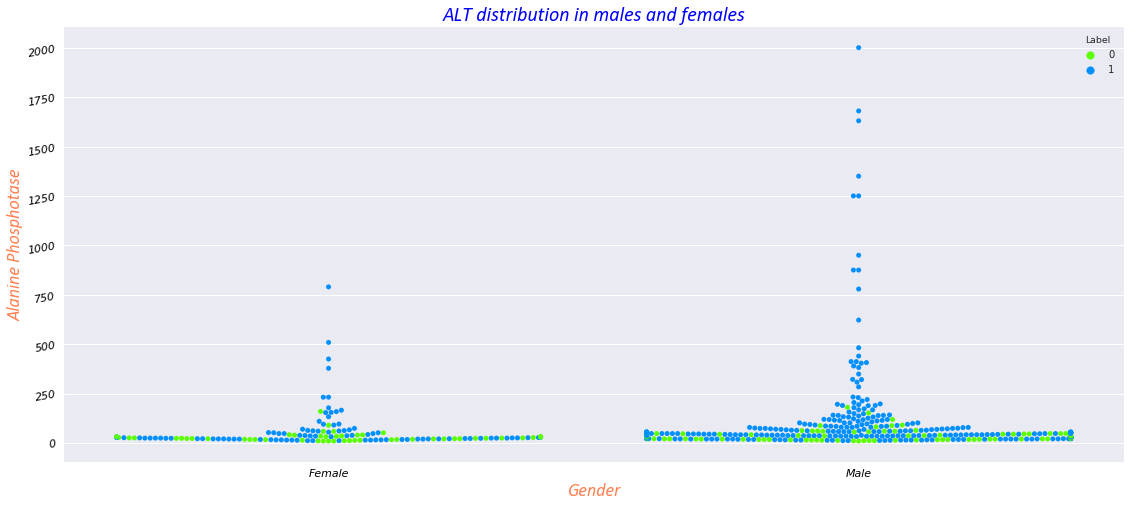

In [56]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Alamine_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alanine Phosphotase',fontdict=label_font_dict)
    plt.title('ALT distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

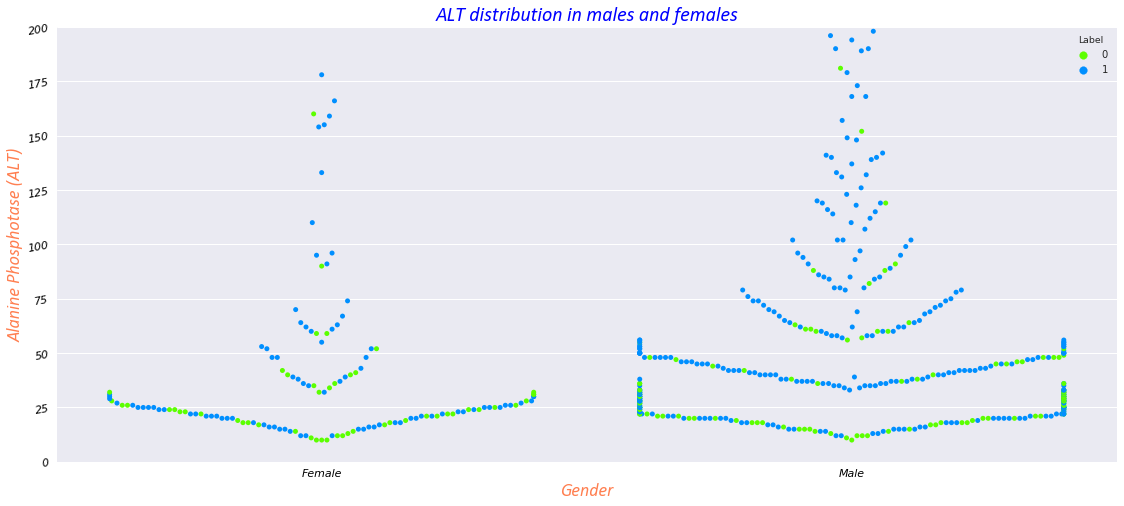

In [57]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Alamine_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.ylim(0,200)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alanine Phosphotase (ALT)',fontdict=label_font_dict)
    plt.title('ALT distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

#### **``PLOT - 15``**
##### **``"AST trend in males and females across all ages"``**

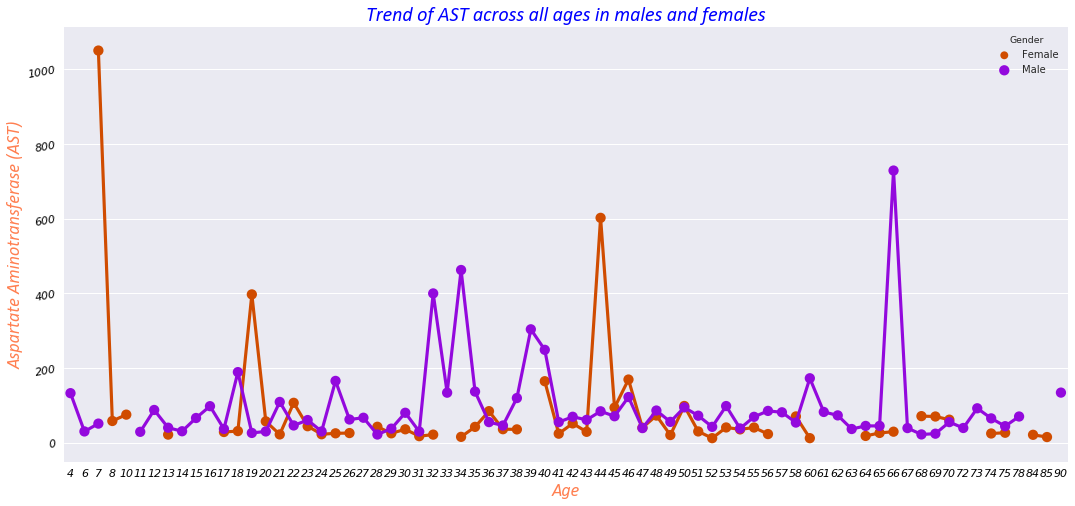

In [58]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,8))
    sns.pointplot(x='Age',y='Aspartate_Aminotransferase',hue='Gender',data=patients_df,palette=sns.color_palette('gnuplot_r',2),ci=False)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Aspartate Aminotransferase (AST)',fontdict=label_font_dict)
    plt.title('Trend of AST across all ages in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **The first look made me feel like I have plotted the chart for ALT, but it is of AST. Looks similar to ALT and needs to be examined closely.**

##### **Let's visualize the distirbution for +ve and -ve cases.**

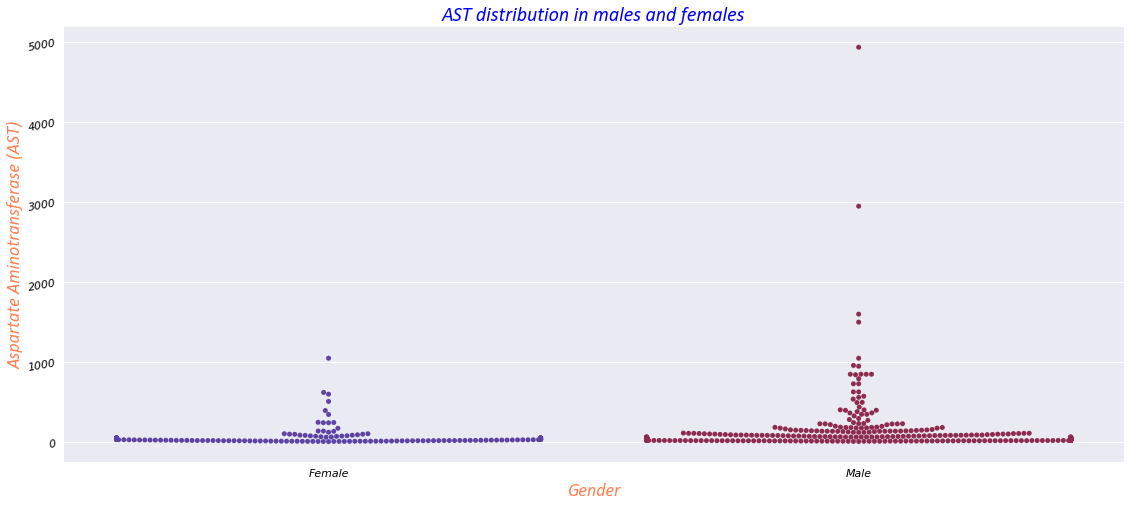

In [59]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Aspartate_Aminotransferase',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Aspartate Aminotransferase (AST)',fontdict=label_font_dict)
    plt.title('AST distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

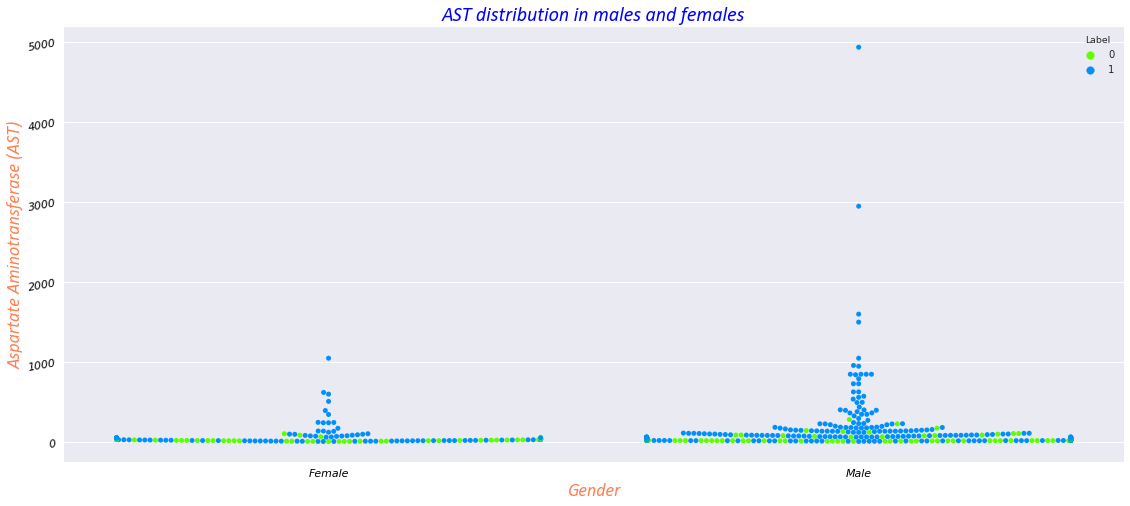

In [60]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Aspartate Aminotransferase (AST)',fontdict=label_font_dict)
    plt.title('AST distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

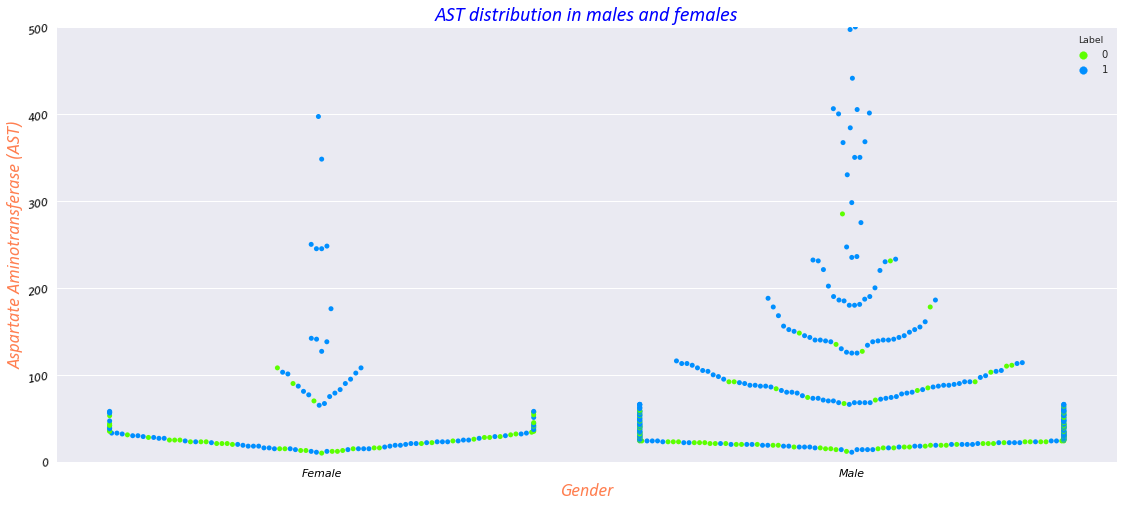

In [61]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.ylim(0,500)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Aspartate Aminotransferase (AST)',fontdict=label_font_dict)
    plt.title('AST distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

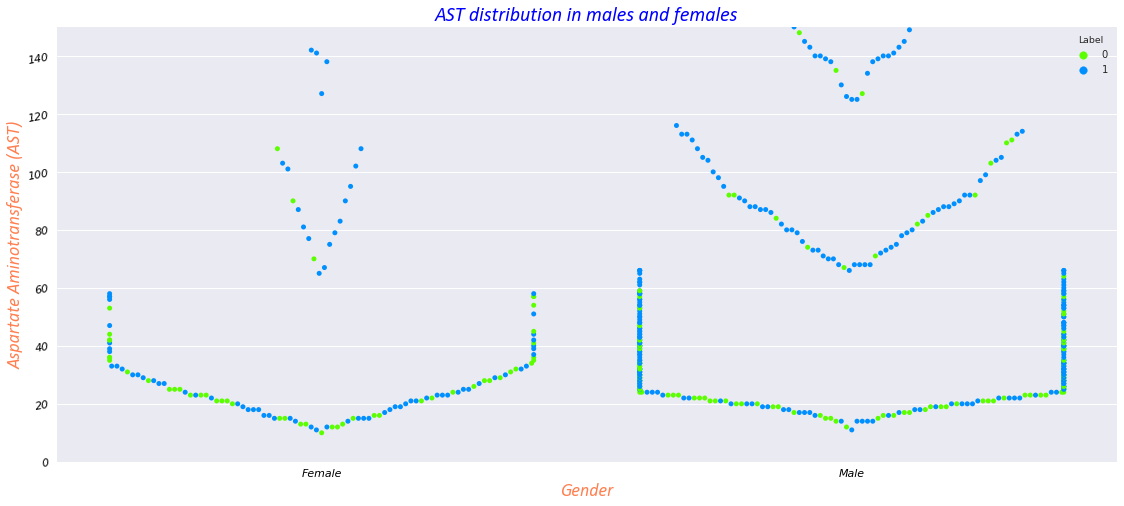

In [62]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.ylim(0,150)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Aspartate Aminotransferase (AST)',fontdict=label_font_dict)
    plt.title('AST distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Majority of the data is less than level of 100 IU/L and values are tightly packed which suggests that AST alone is not influencing the presence of liver disease.**

#### **``PLOT - 16``**
##### **``"Relationship b/w ALT and AST for both type of cases"``**

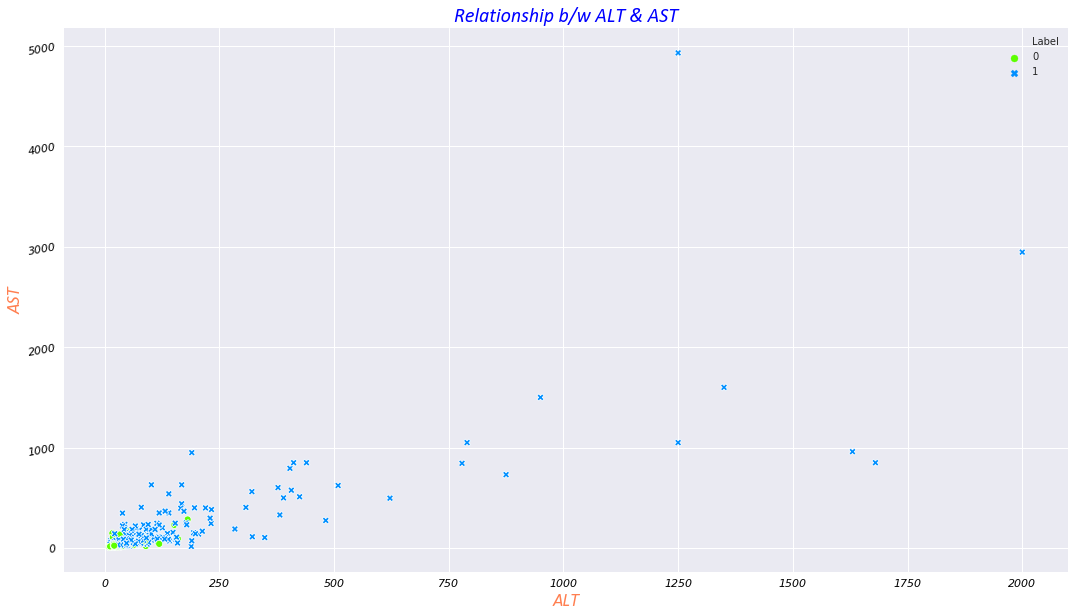

In [96]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,10))
    sns.scatterplot(x='Alamine_Aminotransferase',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,
                    palette=sns.color_palette('gist_rainbow',2),style='Label')
    plt.xlabel('ALT',fontdict=label_font_dict)
    plt.ylabel('AST',fontdict=label_font_dict)
    plt.title('Relationship b/w ALT & AST',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

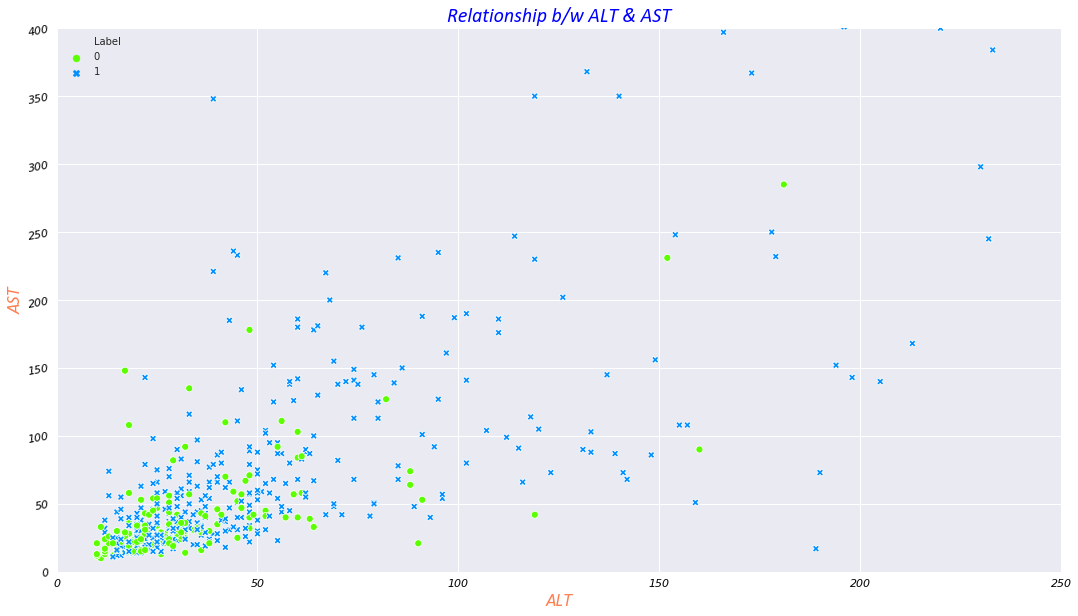

In [98]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,10))
    sns.scatterplot(x='Alamine_Aminotransferase',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,
                   palette=sns.color_palette('gist_rainbow',2),style='Label')
    plt.xlim(0,250)
    plt.ylim(0,400)
    plt.xlabel('ALT',fontdict=label_font_dict)
    plt.ylabel('AST',fontdict=label_font_dict)
    plt.title('Relationship b/w ALT & AST',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
    plt.legend(loc='upper left')

In [87]:
np.corrcoef(x=patients_df['Alamine_Aminotransferase'],y=patients_df['Aspartate_Aminotransferase'])

array([[1.        , 0.79196568],
       [0.79196568, 1.        ]])

In [91]:
pd.DataFrame(np.corrcoef(x=patients_df['Alamine_Aminotransferase'],y=patients_df['Aspartate_Aminotransferase'])).applymap(lambda val:np.square(val))

,0,1
0,1.00000,0.62721
1,0.62721,1.00000


#### **``PLOT - 17``**
##### **``"Quantiles values of ALP for males and females"``**

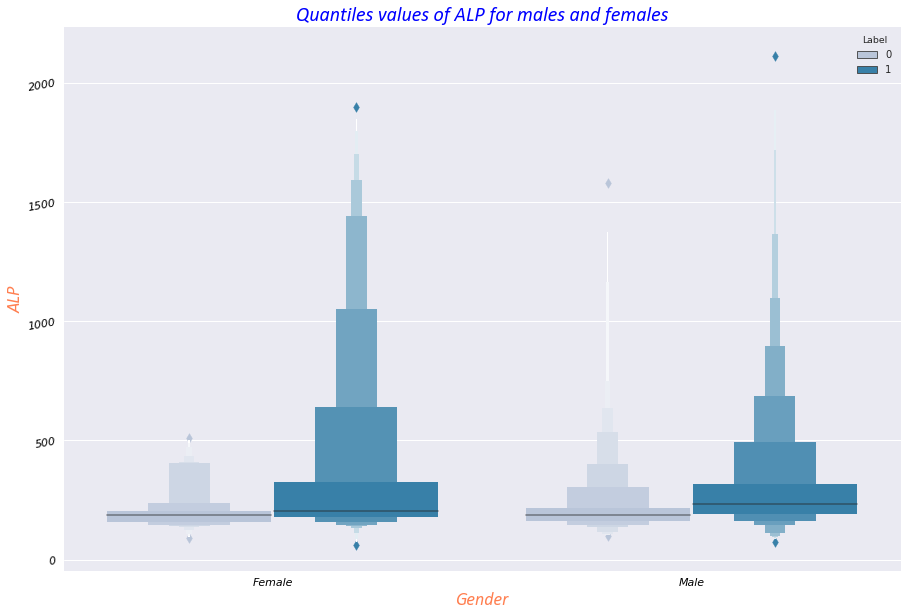

In [147]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.boxenplot(x='Gender',y='Alkaline_Phosphotase',hue='Label',data=patients_df,palette=sns.color_palette('PuBu',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('ALP',fontdict=label_font_dict)
    plt.title('Quantiles values of ALP for males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **This does tells us that the value of ALP in +ve cases is substanially high.**

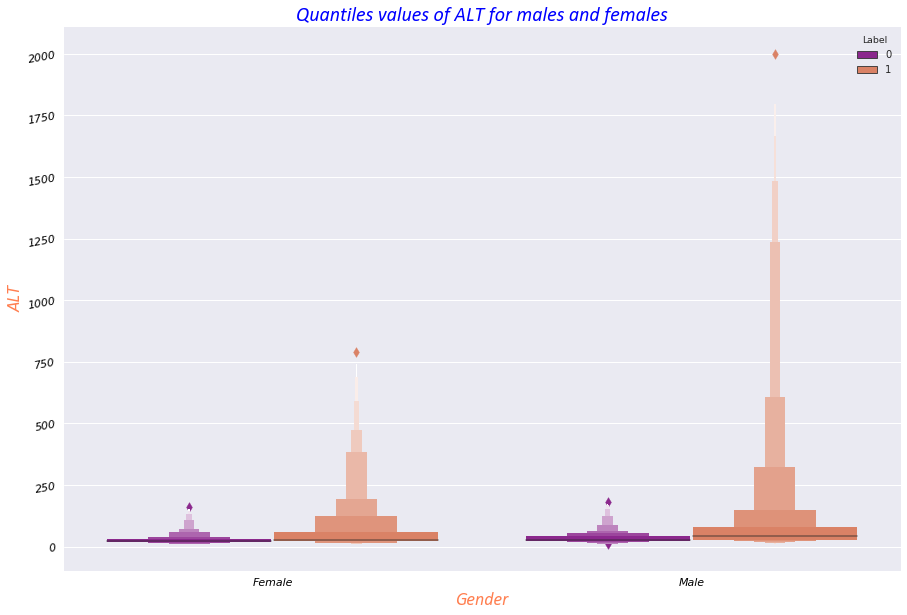

In [146]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.boxenplot(x='Gender',y='Alamine_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('plasma',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('ALT',fontdict=label_font_dict)
    plt.title('Quantiles values of ALT for males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **This does tells us that the value of ALT in +ve cases is substanially high.**

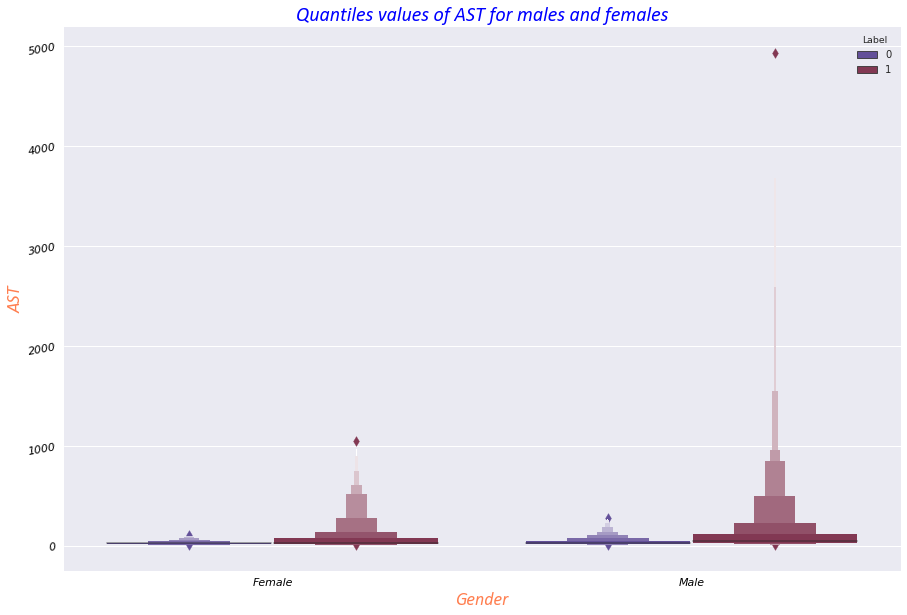

In [148]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.boxenplot(x='Gender',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('AST',fontdict=label_font_dict)
    plt.title('Quantiles values of AST for males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **This does tells us that the value of AST in +ve cases is substanially high.**

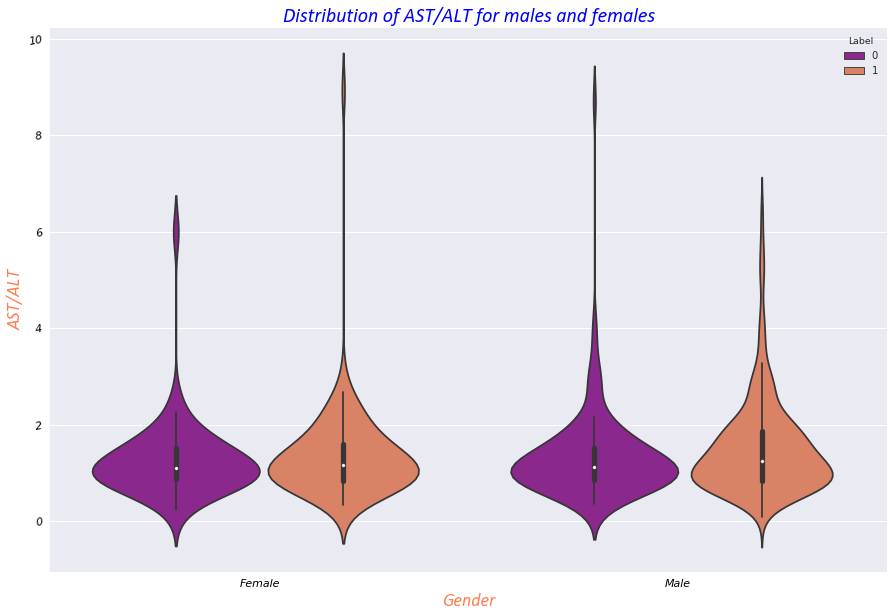

In [152]:
patients_df['AST_ALT_Ratio'] = np.divide(patients_df['Aspartate_Aminotransferase'],patients_df['Alamine_Aminotransferase'])

with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.violinplot(x='Gender',y='AST_ALT_Ratio',hue='Label',data=patients_df,palette=sns.color_palette('plasma',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('AST/ALT',fontdict=label_font_dict)
    plt.title('Distribution of AST/ALT for males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

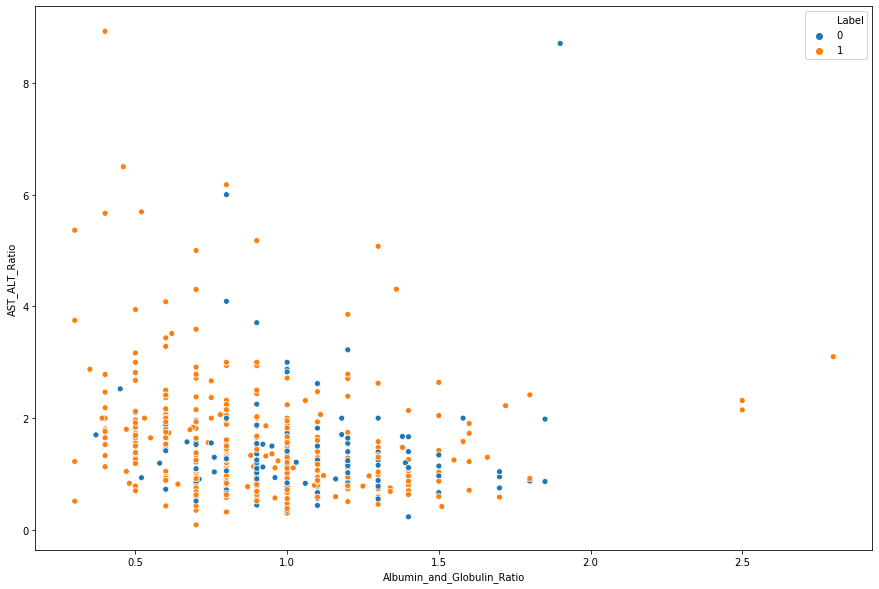

In [158]:
plt.figure(figsize=(15,10))
sns.scatterplot(y='AST_ALT_Ratio',x='Albumin_and_Globulin_Ratio',hue='Label',data=patients_df)

In [112]:
patients_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label,Unconjugated_bilirubin
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0.6
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,5.4
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,3.2
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0.6
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1.9


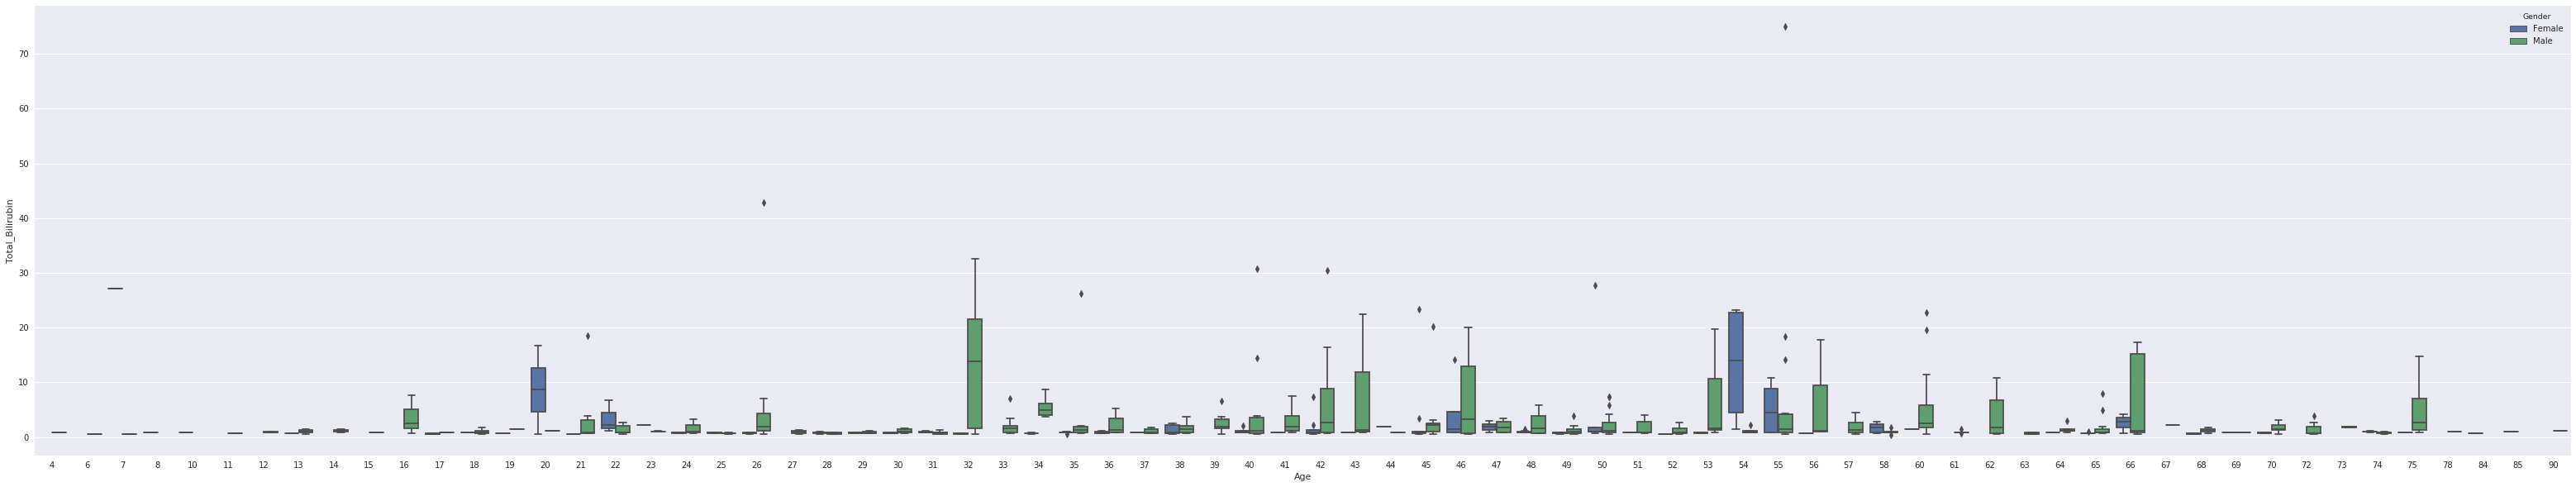

In [64]:
with plt.style.context("seaborn"):
    plt.figure(figsize=(55,10))
    sns.boxplot(x='Age',y="Total_Bilirubin",hue='Gender',data=patients_df)
plt.show()